<a href="https://colab.research.google.com/github/Kishan459/Cardiovascular-Rist-Prediction/blob/main/Cardiovascular_Rist_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

##Variables
###Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.

##Data Description
###Demographic:
###• Sex: male or female("M" or "F")
###• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous) 
##Behavioral
###• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
###• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
##Medical( history)
###• BP Meds: whether or not the patient was on blood pressure medication (Nominal)
###• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
###• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
###• Diabetes: whether or not the patient had diabetes (Nominal) 
##Medical(current)
###• Tot Chol: total cholesterol level (Continuous)
###• Sys BP: systolic blood pressure (Continuous)
###• Dia BP: diastolic blood pressure (Continuous)
###• BMI: Body Mass Index (Continuous)•
###• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
###• Glucose: glucose level (Continuous)
##Predict variable (desired target)
##• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) - DV




##Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score,precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#importimg missingno to visualize missing values 
import missingno as msn

In [4]:
# import dataset
df = pd.read_csv('/content/drive/MyDrive/Datasets/data_cardiovascular_risk.csv')

## Data Checking

In [5]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [7]:
df.shape

(3390, 17)

In [8]:
# summary statistics
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [9]:
# checking null value
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

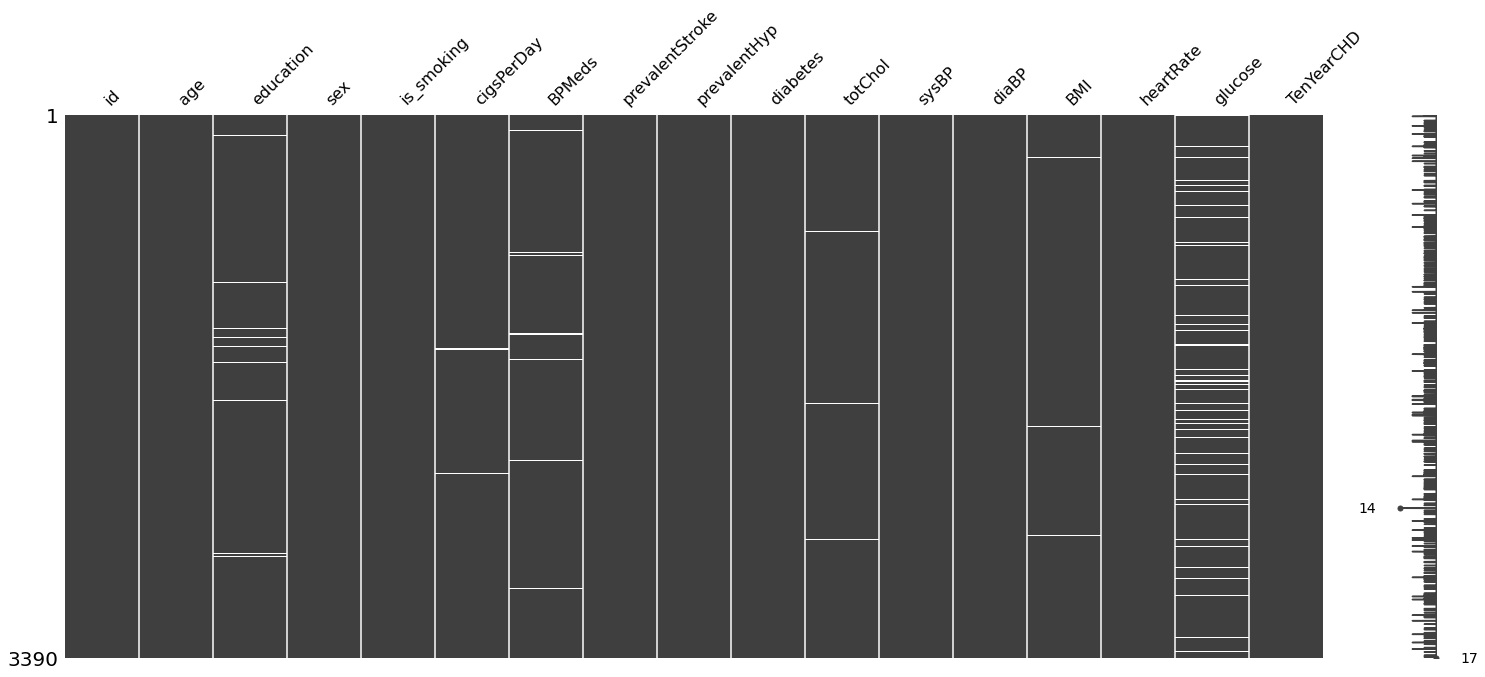

In [10]:
# visualizing missing value 
msn.matrix(df)

### we can se that some features have null values
### we will take care of this at the time of feature engineering.

In [11]:
categorical_columns = ['education','cigsPerDay','sex','is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes','TenYearCHD']
numerical_columns = ['age','totChol','sysBP','diaBP','BMI','heartRate','glucose']

# Univariate Analysis

## TenYearCHD (Target variable)

In [12]:
df['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

In [13]:
df['TenYearCHD'].value_counts(normalize=True)

0    0.849263
1    0.150737
Name: TenYearCHD, dtype: float64

### 85% of observation is of class 0, and only 15% of observation of class 1.


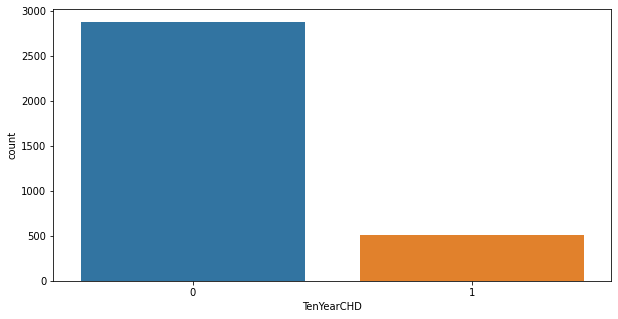

In [14]:
# visualization of TenYearCHD (Target variable)
plt.figure(figsize=(10,5))
sns.countplot(df['TenYearCHD'])

### we can see that our dataset is imbalanced
### we will takecare of this at the time of feature engineering.

## Age

In [15]:
# summary statistics of age
df['age'].describe()

count    3390.000000
mean       49.542183
std         8.592878
min        32.000000
25%        42.000000
50%        49.000000
75%        56.000000
max        70.000000
Name: age, dtype: float64

### According to the summary statistics of age, Maximum age is 70, Minimun age is 32 and Average age of patient is 49.5.
### 75 % of patient is of less than 56 years old.

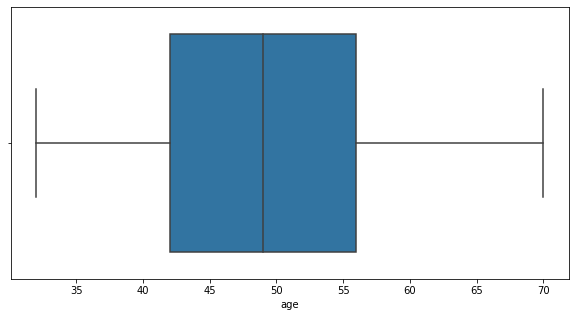

In [16]:
# boxplot of age 
plt.figure(figsize=(10,5))
sns.boxplot(df['age'])

### we say see that there no outlier in age.

Text(0.5, 1.0, 'Distribution of Age')

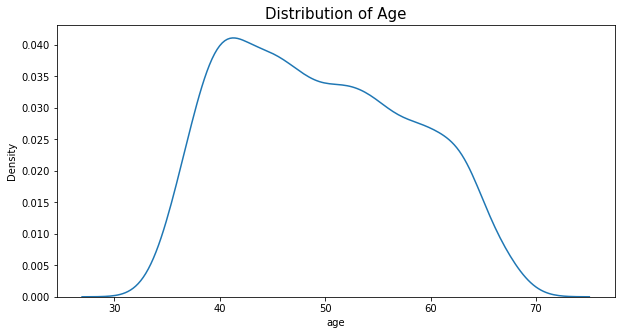

In [17]:
# probability distribution of age
plt.figure(figsize=(10,5))
sns.kdeplot(df['age'])
plt.title('Distribution of Age',fontsize=15)

### we can see that age is not normaly distribuated.
### we will take care of this ay the time of feature engineering

##education

In [18]:
# summary statistics of education
df['education'].describe()

count    3303.000000
mean        1.970936
std         1.019081
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: education, dtype: float64

Text(0.5, 1.0, 'Distribution of Education')

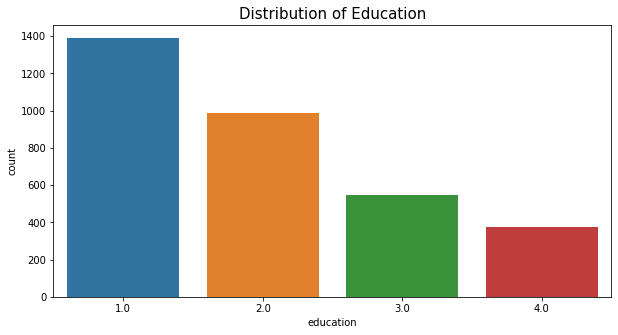

In [19]:
# visualizing distribution of education
plt.figure(figsize=(10,5))
sns.countplot(df['education'])
plt.title('Distribution of Education',fontsize=15)

##Cigs Per Day
###Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

In [20]:
# summary statistics of chigs per day
df['cigsPerDay'].describe()

count    3368.000000
mean        9.069477
std        11.879078
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        70.000000
Name: cigsPerDay, dtype: float64

### According to the summary statistics of the feature we can see that Min cigarettes is 0 which mean there are some non smokers in out data.
### Mean cigarettes somke is 9. and Standard deviation is 12 approx. which means most patient smoke cigarettes in range of 1 to 20 cigarettes per day.
### we can see that median of the this feature is 0. which mean in this data 50% of patient is non smoker and 50% are the patient who smoke.

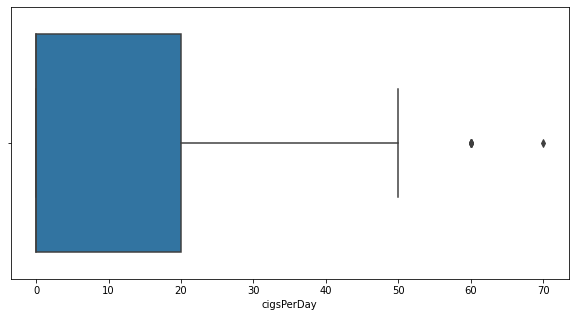

In [21]:
# box plot of chigs per day
plt.figure(figsize=(10,5))
sns.boxplot(df['cigsPerDay'])

### we can see that there are some outlier present in this feature.

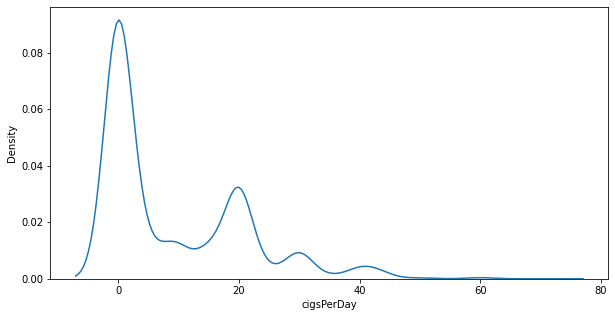

In [22]:
# probability distribution of cigs per day
plt.figure(figsize=(10,5))
sns.kdeplot(df['cigsPerDay'])

### we can see that the distribution of this data is right skewed 
### we will take care of this with the help of log transformtion at the time of feature engineering

In [23]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


# Sex

In [24]:
df['sex'].value_counts(normalize=True)

F    0.567257
M    0.432743
Name: sex, dtype: float64

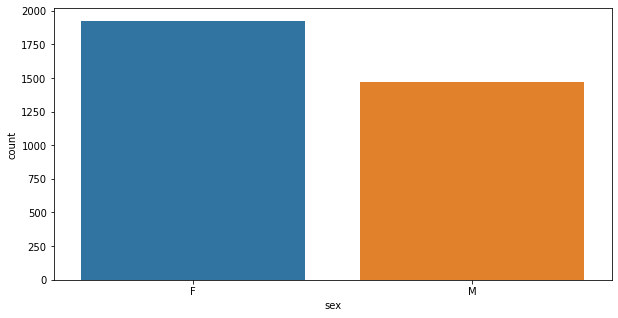

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(df['sex'])

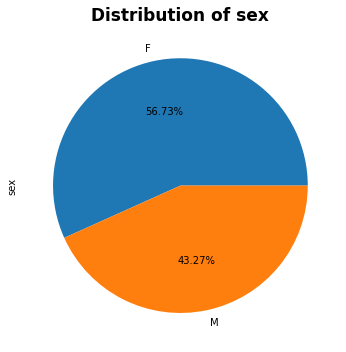

In [26]:
plt.figure(figsize=(15,6))
df.sex.value_counts(normalize=True).plot(kind="pie",autopct="%1.2f%%",figsize=(10,5))
plt.title('Distribution of sex',x = 0.5, y = 1,fontsize=17,weight='bold')
plt.tight_layout();

### There are 56.7% of female patient and 43.2% of male patient in our data.

##is_smoking
### whether or not the patient is a current smoker ("YES" or "NO")

In [27]:
df['is_smoking'].value_counts(normalize=True)

NO     0.50236
YES    0.49764
Name: is_smoking, dtype: float64

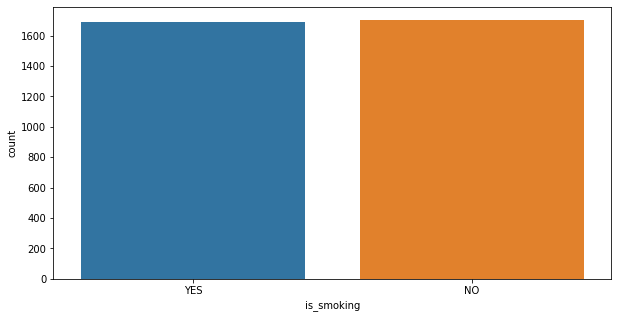

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(df['is_smoking'])

### we can see that there equal no. of somker and non smoker patient in our data.

## BP Meds: whether or not the patient was on blood pressure medication.

In [29]:
df['BPMeds'].value_counts()

0.0    3246
1.0     100
Name: BPMeds, dtype: int64

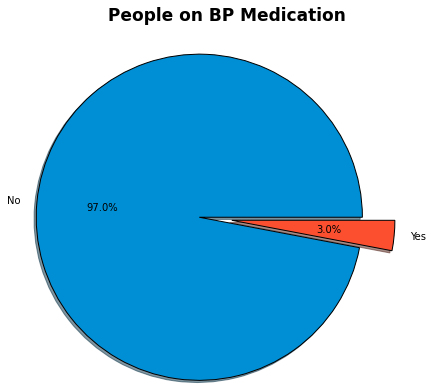

In [30]:
plt.figure(figsize = (7,5))
plt.pie(df['BPMeds'].value_counts(normalize=True), wedgeprops={'edgecolor':'black'},autopct='%1.1f%%',
        explode = [0.0,0.3], labels = ['No','Yes'], colors = ['#008fd5','#fc4f30'],radius = 1.5, shadow = 'True')
plt.title('People on BP Medication',x = 0.6, y = 1.2,fontsize=17,weight='bold')
plt.show();

### we can see from the abovce pie chart that only 3% of patient are on BP Medication, and 97% of peopatientple are not.


##Prevalent Stroke: whether or not the patient had previously had a stroke.

In [31]:
df['prevalentStroke'].value_counts()

0    3368
1      22
Name: prevalentStroke, dtype: int64

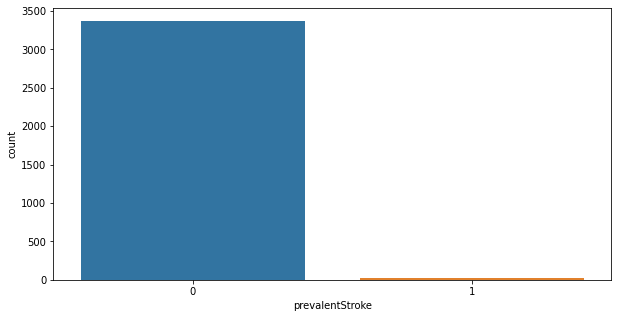

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(df['prevalentStroke'])

### we can see in the above countplot that very few no. of patient had previously had a stroke.

## Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

In [33]:
df['prevalentHyp'].value_counts()

0    2321
1    1069
Name: prevalentHyp, dtype: int64

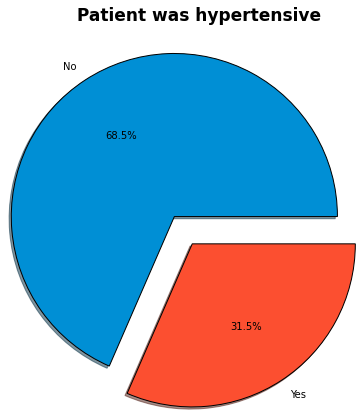

In [34]:
plt.figure(figsize = (7,5))
plt.pie(df['prevalentHyp'].value_counts(normalize=True), wedgeprops={'edgecolor':'black'},autopct='%1.1f%%',
        explode = [0.0,0.3], labels = ['No','Yes'], colors = ['#008fd5','#fc4f30'],radius = 1.5, shadow = 'True')
plt.title('Patient was hypertensive ',x = 0.6, y = 1.2,fontsize=17,weight='bold')
plt.show();

### we can see that 31.5% of patient was hypertensive and 68.5% of patient was not.

##Diabetes: whether or not the patient had diabetes

In [35]:
df['diabetes'].value_counts()

0    3303
1      87
Name: diabetes, dtype: int64

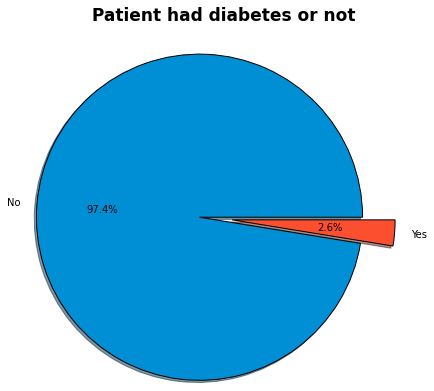

In [36]:
plt.figure(figsize = (7,5))
plt.pie(df['diabetes'].value_counts(normalize=True), wedgeprops={'edgecolor':'black'},autopct='%1.1f%%',
        explode = [0.0,0.3], labels = ['No','Yes'], colors = ['#008fd5','#fc4f30'],radius = 1.5, shadow = 'True')
plt.title('Patient had diabetes or not ',x = 0.6, y = 1.2,fontsize=17,weight='bold')
plt.show();

### we can see that only 2.6% of patient had diabetes and 97.4% hadn't.

##Tot Chol: total cholesterol level

In [37]:
df['totChol'].describe()

count    3352.000000
mean      237.074284
std        45.247430
min       107.000000
25%       206.000000
50%       234.000000
75%       264.000000
max       696.000000
Name: totChol, dtype: float64

### In the above summary statistics see that the min level of cholesterol level is 45.2(which is very low) and standatd deviation is 45.2.
### we can see that max cholesterol level in out data is 696 which is an outlier.


### According to https://medlineplus.gov/lab-tests/cholesterol-levels/ 
###Total Cholesterol Level Category 
###Less than 200mg/dL -  Desirable 
###200-239 mg/dL -  Borderline high 
###240mg/dL and above -  High


Total Cholesterol Level	Category
Less than 200mg/dL	Desirable
200-239 mg/dL	Borderline high
240mg/dL and above	High

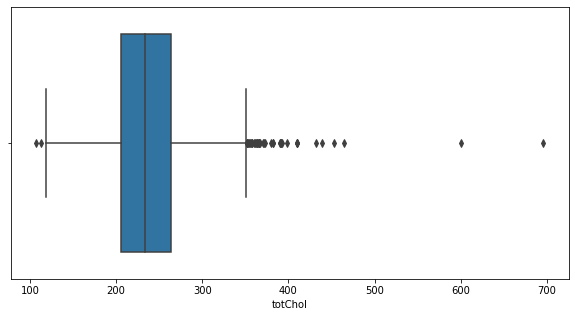

In [38]:
plt.figure(figsize=(10,5))
sns.boxplot(df['totChol'])

### we saan see there are some outlier present in the above boxplot.
### we will remove it at the time of feature engineering.

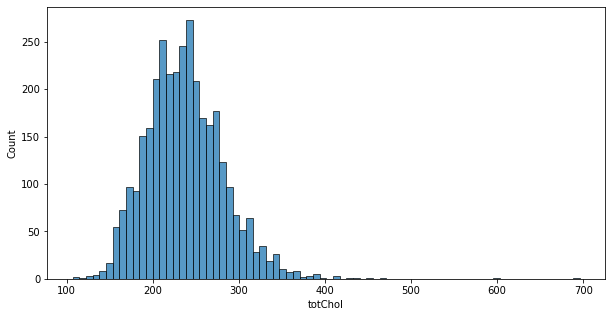

In [39]:
plt.figure(figsize=(10,5))
sns.histplot(df['totChol'])

##Sys BP: systolic blood pressure

In [40]:
df['sysBP'].describe()

count    3390.00000
mean      132.60118
std        22.29203
min        83.50000
25%       117.00000
50%       128.50000
75%       144.00000
max       295.00000
Name: sysBP, dtype: float64

### from the above summary statistics we can see that mean  systolic BP is 132.6  and standard deviation is 83.5.
### minimum systolic BP is 22.2
### 25% of patient has systolic bp of less than 117.
### 50% of patient has systolic bp of less than 128.
### 75% of patient has systolic bp of less than 144.
### maximum systiloc bp is 295 which is very high we say say that it is an outlier.
### According to https://www.cdc.gov/bloodpressure/about.htm
### Normal systolic Bp is - less than 120 mm Hg
### Eleveted - 120–129 mm Hg
### High blood pressure (hypertension) - 130 mm Hg or higher

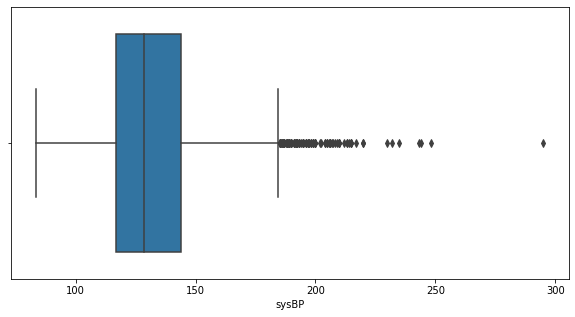

In [41]:
plt.figure(figsize=(10,5))
sns.boxplot(df['sysBP'])

### we an see there are manny outliers in sysBP 
### we will take care of this at the time of feature engineering.

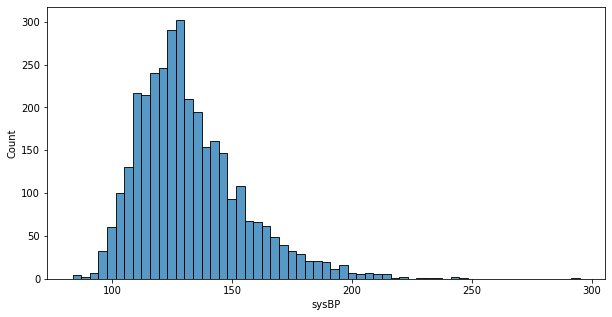

In [42]:
plt.figure(figsize=(10,5))
sns.histplot(df['sysBP'])

In [43]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


##Dia BP: diastolic blood pressure

In [44]:
df['diaBP'].describe()

count    3390.000000
mean       82.883038
std        12.023581
min        48.000000
25%        74.500000
50%        82.000000
75%        90.000000
max       142.500000
Name: diaBP, dtype: float64

### From the above summary table we can see that mean diastolic blood pressure is 82.88 and standard deviation is 12 so  in our data most patient's diastolicn blood pressure are in range of 70 to 95.
### we can see that 75% of patients have dialostic BP less than 90.
### 50% of paitents have  less than 82.
### maximum dialostic Bp is 142.5 which is very high so we will consider this an outlier.
### According to https://www.cdc.gov/bloodpressure/about.htm 
###  * Normal dialostic BP is  less than 80 mm Hg
### * Elevated dialostic BP is  less than 80 mm Hg
### * High blood pressure (hypertension) - 80 mm Hg or higher


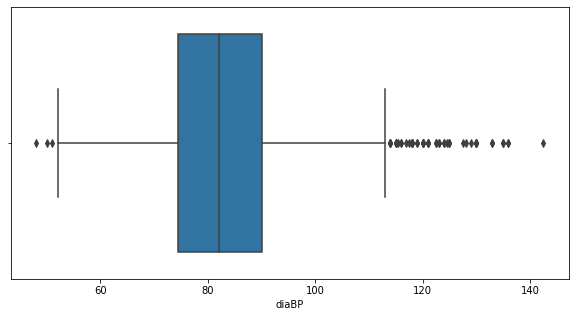

In [45]:
plt.figure(figsize=(10,5))
sns.boxplot(df['diaBP'])

### we can see that there are some outliers are present in this feature we will take care of this at the time of feature engineering. 

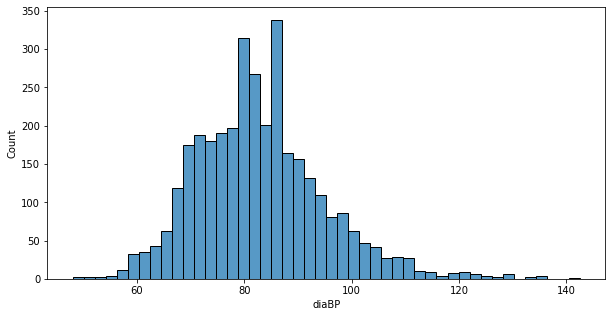

In [46]:
plt.figure(figsize=(10,5))
sns.histplot(df['diaBP'])

##BMI: Body Mass Index

In [47]:
df['BMI'].describe()

count    3376.000000
mean       25.794964
std         4.115449
min        15.960000
25%        23.020000
50%        25.380000
75%        28.040000
max        56.800000
Name: BMI, dtype: float64

### As we can see in the above summary table mean BMI is 25.8 and standard deviation is 4 approx, so Most of the paitents BMI is in range of 20 to 30.
### Minnimum BMI is 16.
### 25% of paitent's  BMi is less than 23
### 50% of paitent's  BMI is less than 25.3
### 75% of paitent's  BMI less than 28
### Maximum BMI is 56.8

###BMI levels for adults are categorized as follows:

####* Normal weight: 18.5 to 24.9
####*  Overweight: 25 to 29.9
####*  Obese: 30 or greater
####*  Obesity is further classified as:

#### Class 1 obesity: BMI = 30 to 34.9
#### Class 2 obesity: BMI = 35 to 39.9
#### Class 3 obesity: BMI 40 or higher

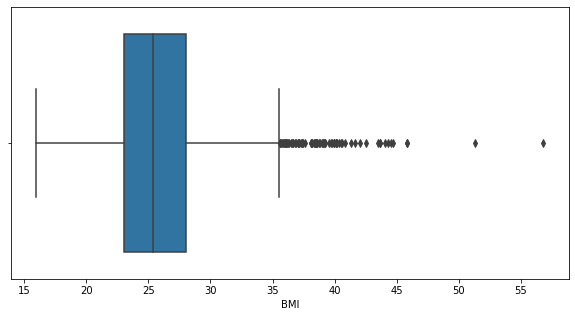

In [48]:
plt.figure(figsize=(10,5))
sns.boxplot(df['BMI'])

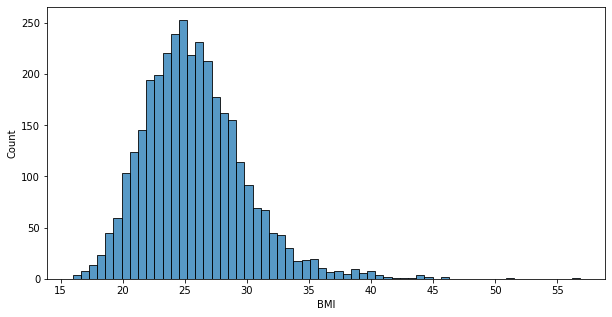

In [49]:
plt.figure(figsize=(10,5))
sns.histplot(df['BMI'])

### BMI is slightly right skewed normally distributed.

##Heart Rate

In [50]:
plt.figure(figsize=(10,5))
df['heartRate'].describe()

count    3389.000000
mean       75.977279
std        11.971868
min        45.000000
25%        68.000000
50%        75.000000
75%        83.000000
max       143.000000
Name: heartRate, dtype: float64

<Figure size 720x360 with 0 Axes>

### According to the above summary table mean heartrate is 76 appox, standard deviation is 12.
### Minimum heart rate is 45 and maximum is 143.
### 75% of people have heart rate less than 83.

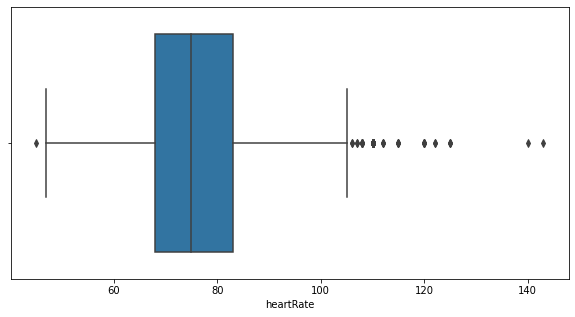

In [51]:
plt.figure(figsize=(10,5))
sns.boxplot(df['heartRate'])

### there are some outliers present in heart rate

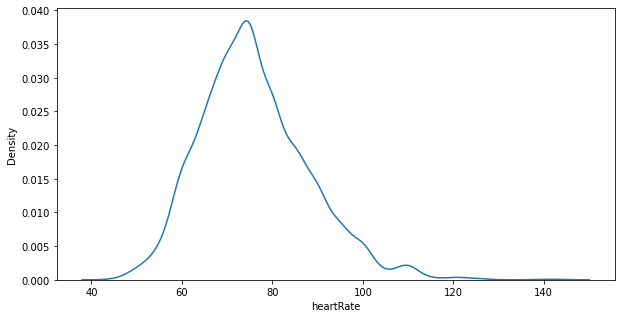

In [52]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['heartRate'])

### Heart rate is  right skewed normally distributed

## Glucose level 

In [53]:
df['glucose'].describe()

count    3086.000000
mean       82.086520
std        24.244753
min        40.000000
25%        71.000000
50%        78.000000
75%        87.000000
max       394.000000
Name: glucose, dtype: float64

### In the above summary statistics we can see that mean is 82 and standard deviation is 24.
### Minumum glucose level is 40 and maximum is 394.
### 50% of paitents have glucose level of less than 78.
### 75% of paients have glucose level of less than 87.

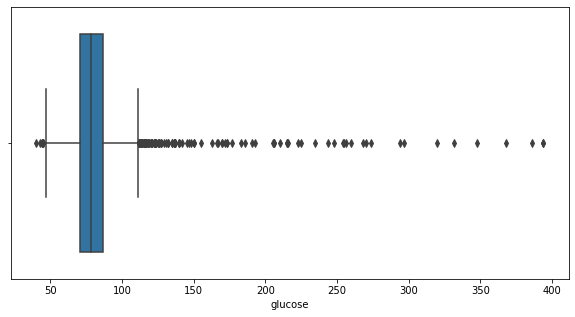

In [54]:
plt.figure(figsize=(10,5))
sns.boxplot(df['glucose'])

### we can see there are some outliers present is glucose level.

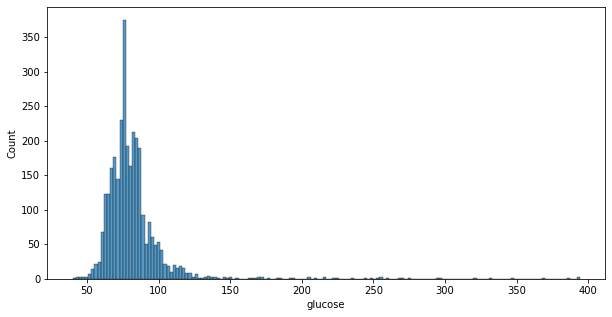

In [55]:
 plt.figure(figsize=(10,5))
sns.histplot(df['glucose'])

### we can see that ditribution of glucose level is right skewed. 

In [56]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


#Bivariate Analysis

## Age vs TenYearCHD

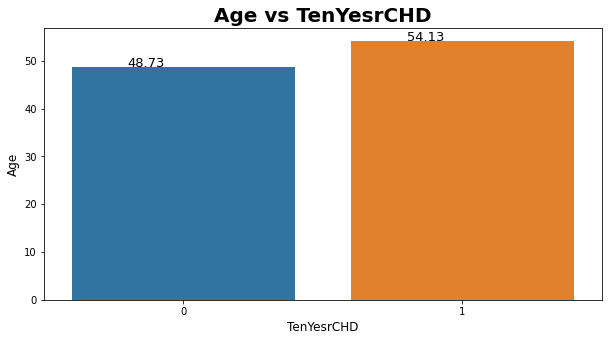

In [57]:
plt.figure(figsize=(10,5))
age_nd_ty_chd = round(df.groupby('TenYearCHD')['age'].mean(),2)
ax = sns.barplot(age_nd_ty_chd.index,age_nd_ty_chd.values)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), color='black', size=13)
plt.ylabel('Age',fontsize=12)
plt.xlabel('TenYesrCHD',fontsize=12)
plt.title('Age vs TenYesrCHD',fontsize=20,weight='bold')
plt.show()

### Average age of paitents with risk of coronary heart disease is 54, and avarage age of people with no risk of coronary heart disease is 48.8.

## Sex vs TenTearCHD

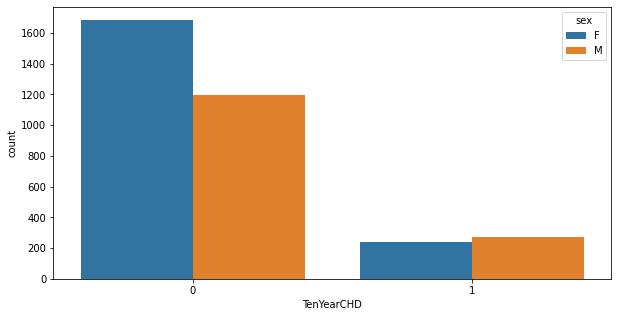

In [58]:
plt.figure(figsize=(10,5))
sns.countplot(df['TenYearCHD'],hue=df['sex'])

### According to the above visualization we can say that women have lower risk of coronary heart disease than men.

## is_smoking vs TenYearCHD

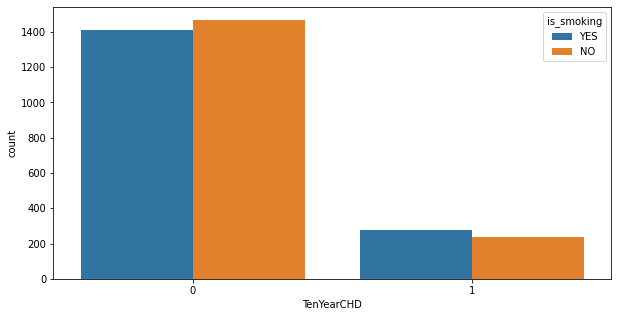

In [59]:
plt.figure(figsize=(10,5))
sns.countplot(df['TenYearCHD'],hue=df['is_smoking'])

### According to the above visualization we can say that paitents who some has higher risk of coronary heart disease than the paitents who don't

##CigsPerDay vs TenYearCHD

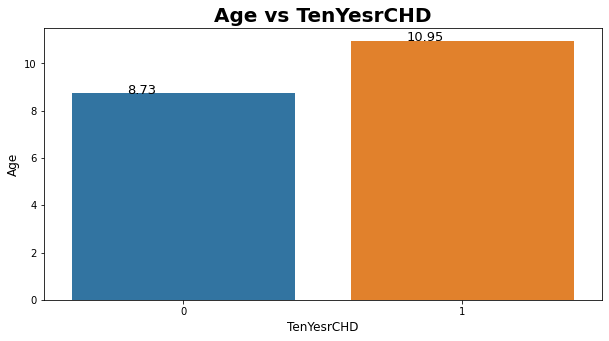

In [60]:
plt.figure(figsize=(10,5))
cigs_pd_nd_ty_chd = round(df.groupby('TenYearCHD')['cigsPerDay'].mean(),2)
ax = sns.barplot(cigs_pd_nd_ty_chd.index,cigs_pd_nd_ty_chd.values)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), color='black', size=13)
plt.ylabel('Age',fontsize=12)
plt.xlabel('TenYesrCHD',fontsize=12)
plt.title('Age vs TenYesrCHD',fontsize=20,weight='bold')
plt.show()

### we can see that the paitents who smoke on an average 10 to 11 ciggrates per day have higher risk of coronary heart disease.
### and the paitents who smoke on an average 9 or less ciggrates per day have lower risk coronary heart disease

##BPMeds vs TenYearCHD

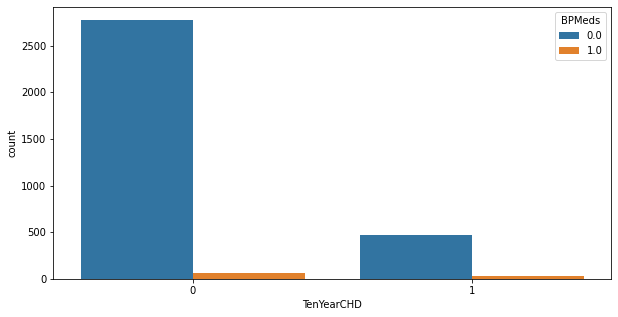

In [61]:
plt.figure(figsize=(10,5))
sns.countplot(df['TenYearCHD'],hue=df['BPMeds'])

###we can see that risk of coronary heart disease has nothing to do with BPMeds

## Prevalent Stroke vs TenYearCHD

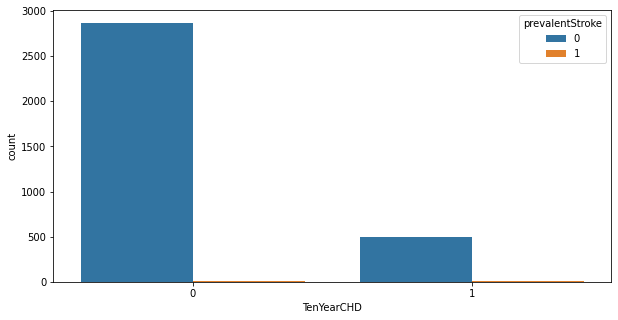

In [62]:
plt.figure(figsize=(10,5))
sns.countplot(df['TenYearCHD'],hue=df['prevalentStroke'])

### we can see that risk of coronary heart disease has nothing to do with Prevalant Stroke 

## prevalentHyp vs TenYearCHD

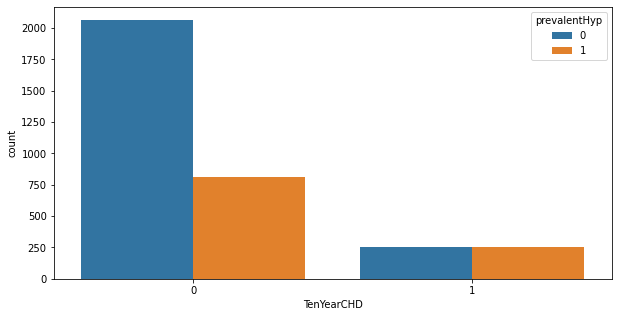

In [63]:
plt.figure(figsize=(10,5))
sns.countplot(df['TenYearCHD'],hue=df['prevalentHyp'])

### we can se that hypertensive is also has nothimg to do with coronary heart disease.

##diabetes vs TenYearCHD

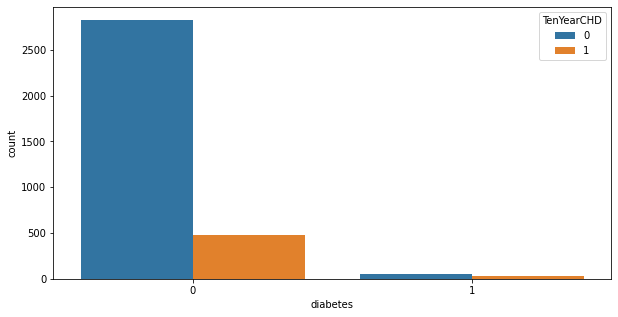

In [64]:
plt.figure(figsize=(10,5))
sns.countplot(df['diabetes'],hue=df['TenYearCHD'])

### we can se that diabetes is also has nothimg to do with coronary heart dise

## Total cholesterol level Vs TenYearCHD

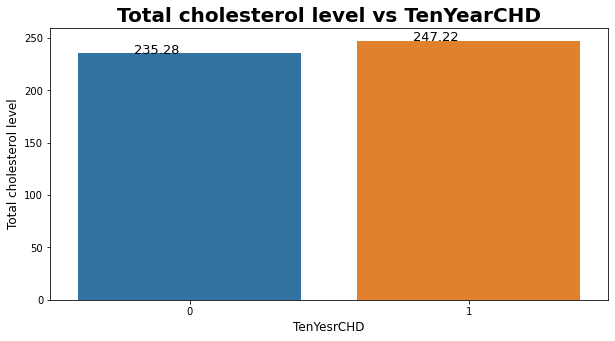

In [65]:
plt.figure(figsize=(10,5))
totChol_nd_ty_chd = round(df.groupby('TenYearCHD')['totChol'].mean(),2)
ax = sns.barplot(totChol_nd_ty_chd.index,totChol_nd_ty_chd.values)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), color='black', size=13)
plt.ylabel('Total cholesterol level',fontsize=12)
plt.xlabel('TenYesrCHD',fontsize=12)
plt.title('Total cholesterol level vs TenYearCHD',fontsize=20,weight='bold')
plt.show()

### According to https://medlineplus.gov/lab-tests/cholesterol-levels/ 
###Total Cholesterol Level Category 
###Less than 200mg/dL -  Desirable 
###200-239 mg/dL -  Borderline high 
###240mg/dL and above -  High
### so we can say that if a paitents have High Total Cholesterol which means more than 240mg/dL have high risk of coronary heart disease.

##Systolic blood pressure vs TenYearCHD

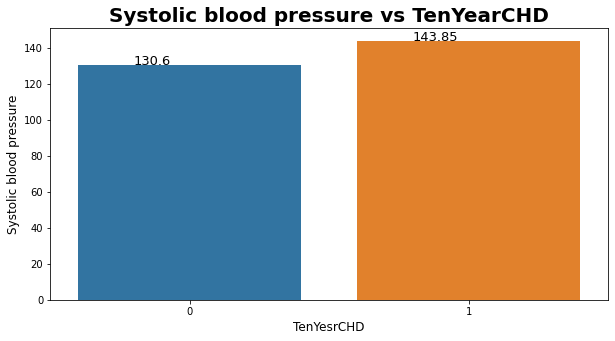

In [66]:
plt.figure(figsize=(10,5))
sysBP_nd_ty_chd = round(df.groupby('TenYearCHD')['sysBP'].mean(),2)
ax = sns.barplot(sysBP_nd_ty_chd.index,sysBP_nd_ty_chd.values)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), color='black', size=13)
plt.ylabel('Systolic blood pressure',fontsize=12)
plt.xlabel('TenYesrCHD',fontsize=12)
plt.title('Systolic blood pressure vs TenYearCHD',fontsize=20,weight='bold')
plt.show()

### According to https://www.cdc.gov/bloodpressure/about.htm
### Normal systolic Bp is - less than 120 mm Hg
### Eleveted - 120–129 mm Hg
### High blood pressure (hypertension) - 130 mm Hg or higher
### According to above countplot we can say that if a paitents have High Sysolic blood pressure then there is high risk of coronary heart disease.

##Diastolic blood pressure vs TenYearCHD

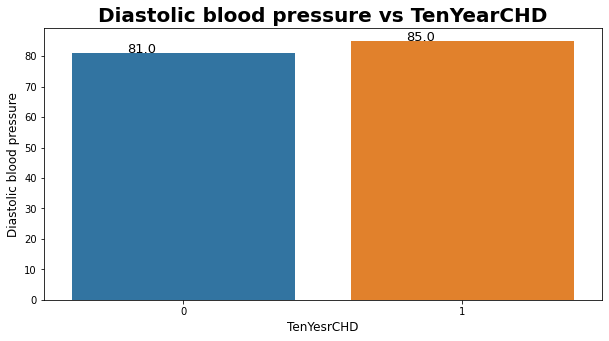

In [67]:
plt.figure(figsize=(10,5))
diaBP_nd_ty_chd = round(df.groupby('TenYearCHD')['diaBP'].median(),2)
ax = sns.barplot(diaBP_nd_ty_chd.index,diaBP_nd_ty_chd.values)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), color='black', size=13)
plt.ylabel('Diastolic blood pressure',fontsize=12)
plt.xlabel('TenYesrCHD',fontsize=12)
plt.title('Diastolic blood pressure vs TenYearCHD',fontsize=20,weight='bold')
plt.show()

### According to https://www.cdc.gov/bloodpressure/about.htm 
###  * Normal dialostic BP is  less than 80 mm Hg
### * Elevated dialostic BP is  less than 80 mm Hg
### * High blood pressure (hypertension) - 80 mm Hg or higher
###According to above countplot we can say that if a paitents have High Diastolic blood pressure then there is high risk of coronary heart disease.

## Body Mass Index vs TenYearCHD

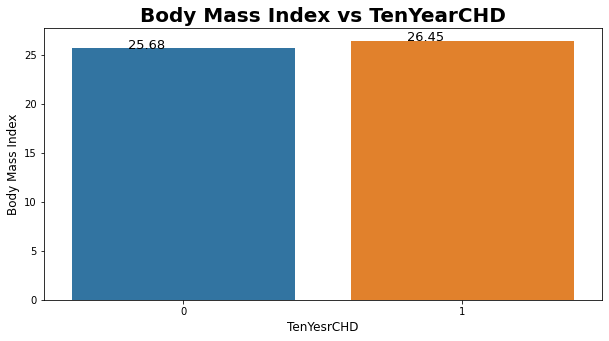

In [68]:
plt.figure(figsize=(10,5))
BMI_nd_ty_chd = round(df.groupby('TenYearCHD')['BMI'].mean(),2)
ax = sns.barplot(BMI_nd_ty_chd.index,BMI_nd_ty_chd.values)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), color='black', size=13)
plt.ylabel('Body Mass Index',fontsize=12)
plt.xlabel('TenYesrCHD',fontsize=12)
plt.title('Body Mass Index vs TenYearCHD',fontsize=20,weight='bold')
plt.show()

### from the above visualization we can say that if a paitents have higher BMI then there is higher chance of coronary heart disease

##Heart Rate Vs TenYearCHD

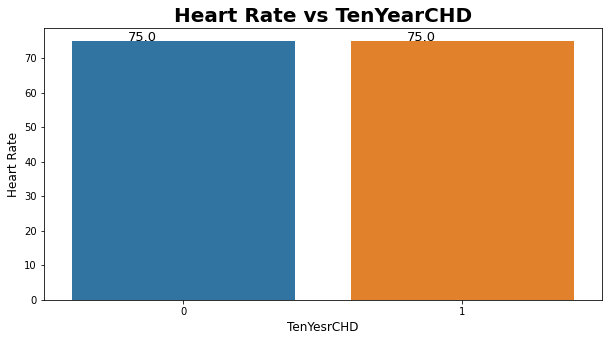

In [69]:
plt.figure(figsize=(10,5))
heartRate_nd_ty_chd = round(df.groupby('TenYearCHD')['heartRate'].median(),2)
ax = sns.barplot(heartRate_nd_ty_chd .index,heartRate_nd_ty_chd .values)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), color='black', size=13)
plt.ylabel('Heart Rate',fontsize=12)
plt.xlabel('TenYesrCHD',fontsize=12)
plt.title('Heart Rate vs TenYearCHD',fontsize=20,weight='bold')
plt.show()

### we can see that the median heart rate is same for both so we can say that heart has nothing to do with coronary heart disease
### we have taken median of heart rate because there are some outliers present in heart rate feature

##Glucose level vs TenYearCHD

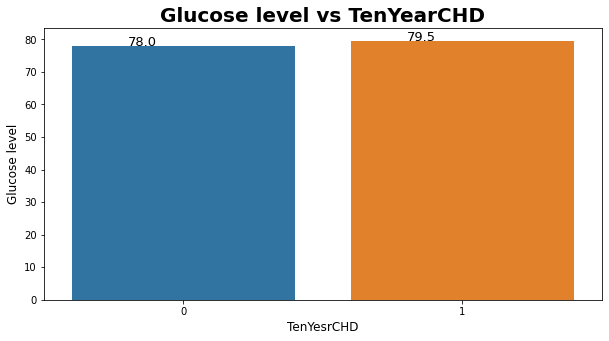

In [70]:
plt.figure(figsize=(10,5))
glucose_nd_ty_chd = round(df.groupby('TenYearCHD')['glucose'].median(),2)
ax = sns.barplot(glucose_nd_ty_chd .index,glucose_nd_ty_chd .values)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), color='black', size=13)
plt.ylabel('Glucose level',fontsize=12)
plt.xlabel('TenYesrCHD',fontsize=12)
plt.title('Glucose level vs TenYearCHD',fontsize=20,weight='bold')
plt.show()

### we can see that the median glucose is almost same for both so we can say that heart has nothing to do with coronary heart disease
### we have taken median of glucose level because there are some outliers present in glucose level feature

In [71]:
# Creating a function to plot distribution of numerical columns
def dist_plotting(columns):
  ''' Returns subplots of histograms using seaborn '''
  sns.set_style('whitegrid')
  fig, axes = plt.subplots(len(columns) , figsize=(18,40))
  
  plot_list = zip(list(range(0,len(columns)+1)), columns)

  for i , column in plot_list:
    sns.histplot(ax = axes[i], x = df[column], kde = True)

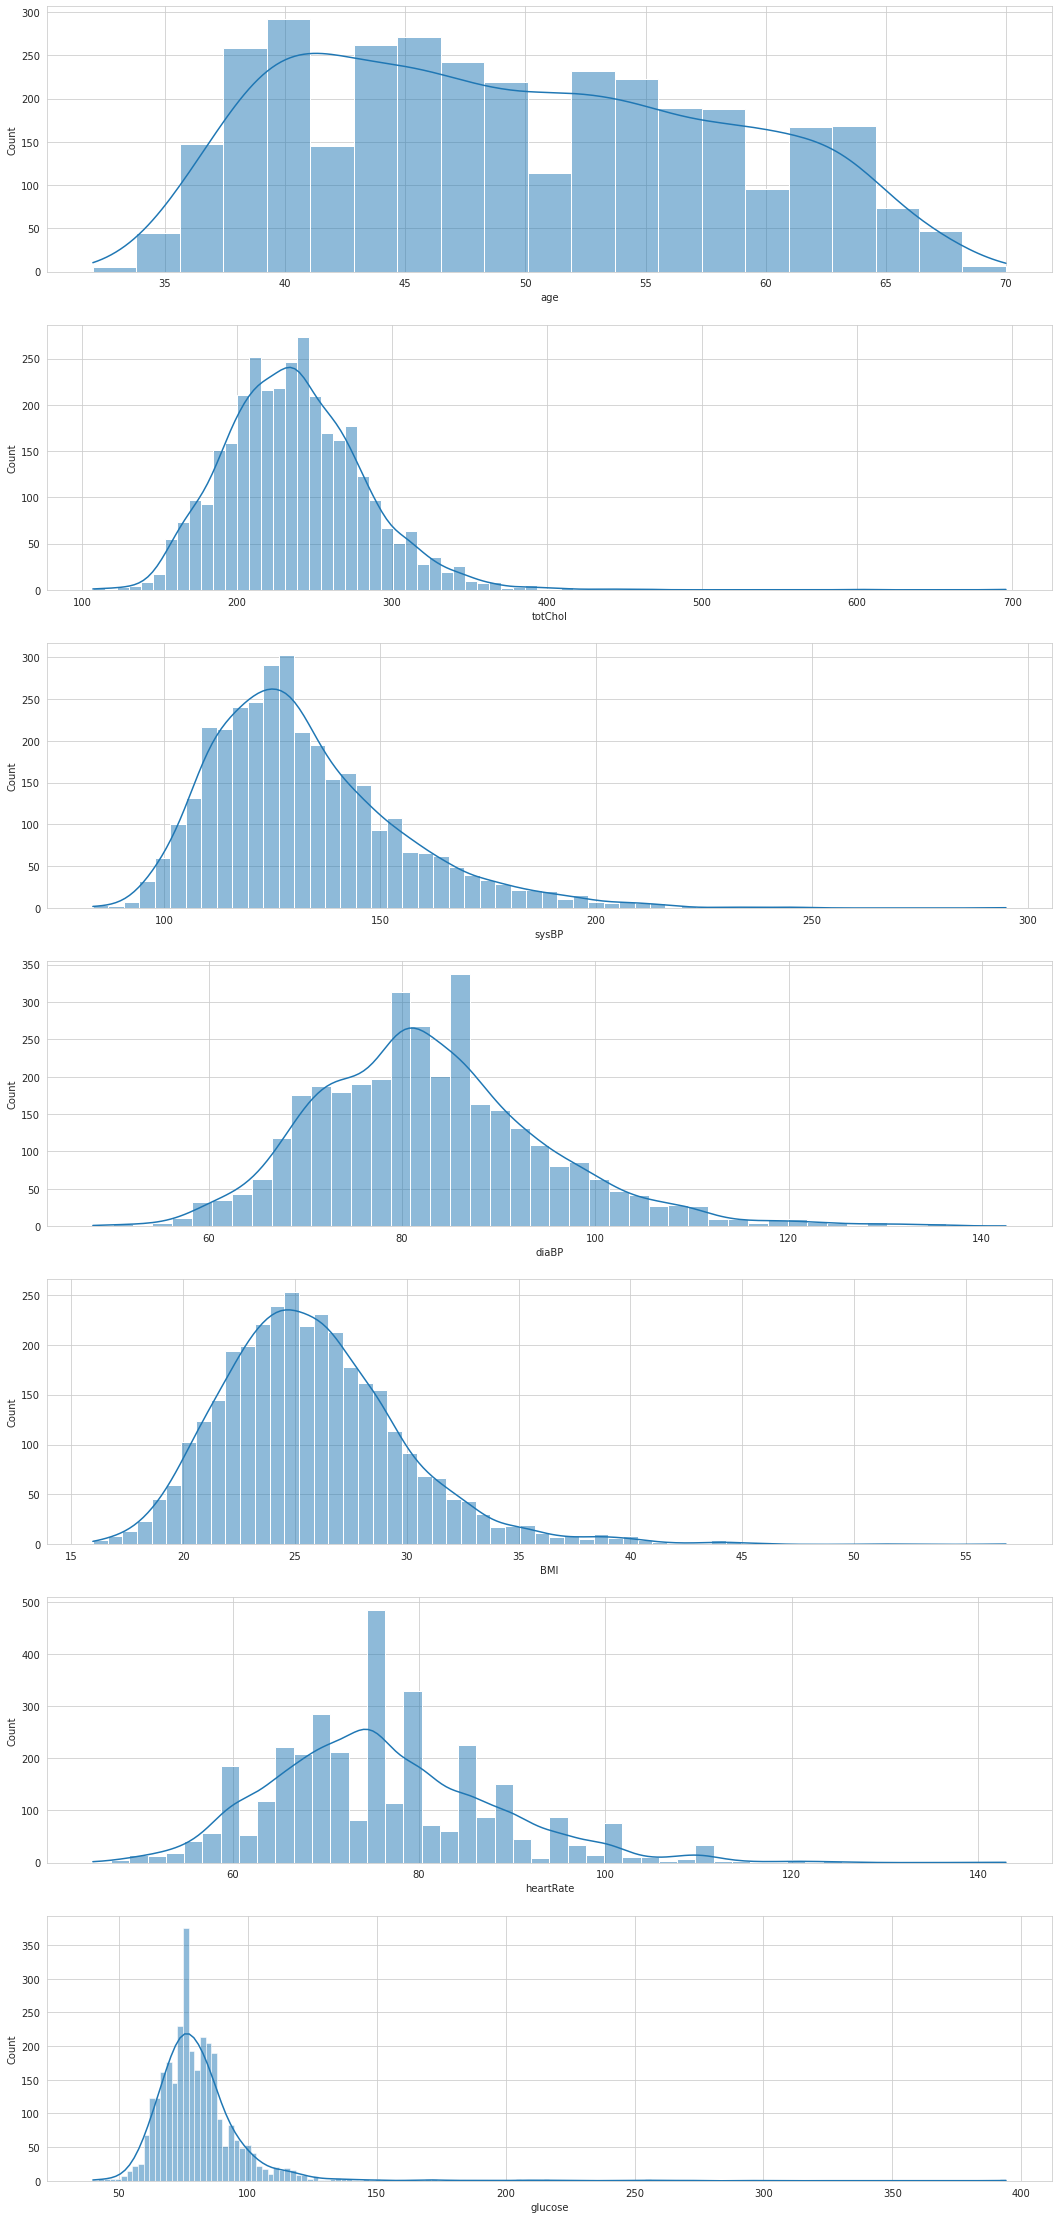

In [72]:
dist_plotting(numerical_columns)

####from he above visualization we can see that
Age ranges from 35 years to 70 years and is almost normally distributed, with most people belonging to an age group of 40.
Cigarettes smoked per day on an average are mainly 0, but 20 cigarettes a day are also prevalent.
Cholestrol ranges form 100 to 700, with most belonging to 150 to 350.
Systolic BP ranges mainly from 100 to 200.
Diastolic BP ranges mainly from 60 to 120.
BMI ranges mainly from 16 to 40.
Heart rate ranges from 40 to 110 and most occurances are around 75.
Glucose ranges mainly from 50 to 125, rest seem like outliers with extreme numbers but cannot be ignored as these numbers can cause risk of heart disease.

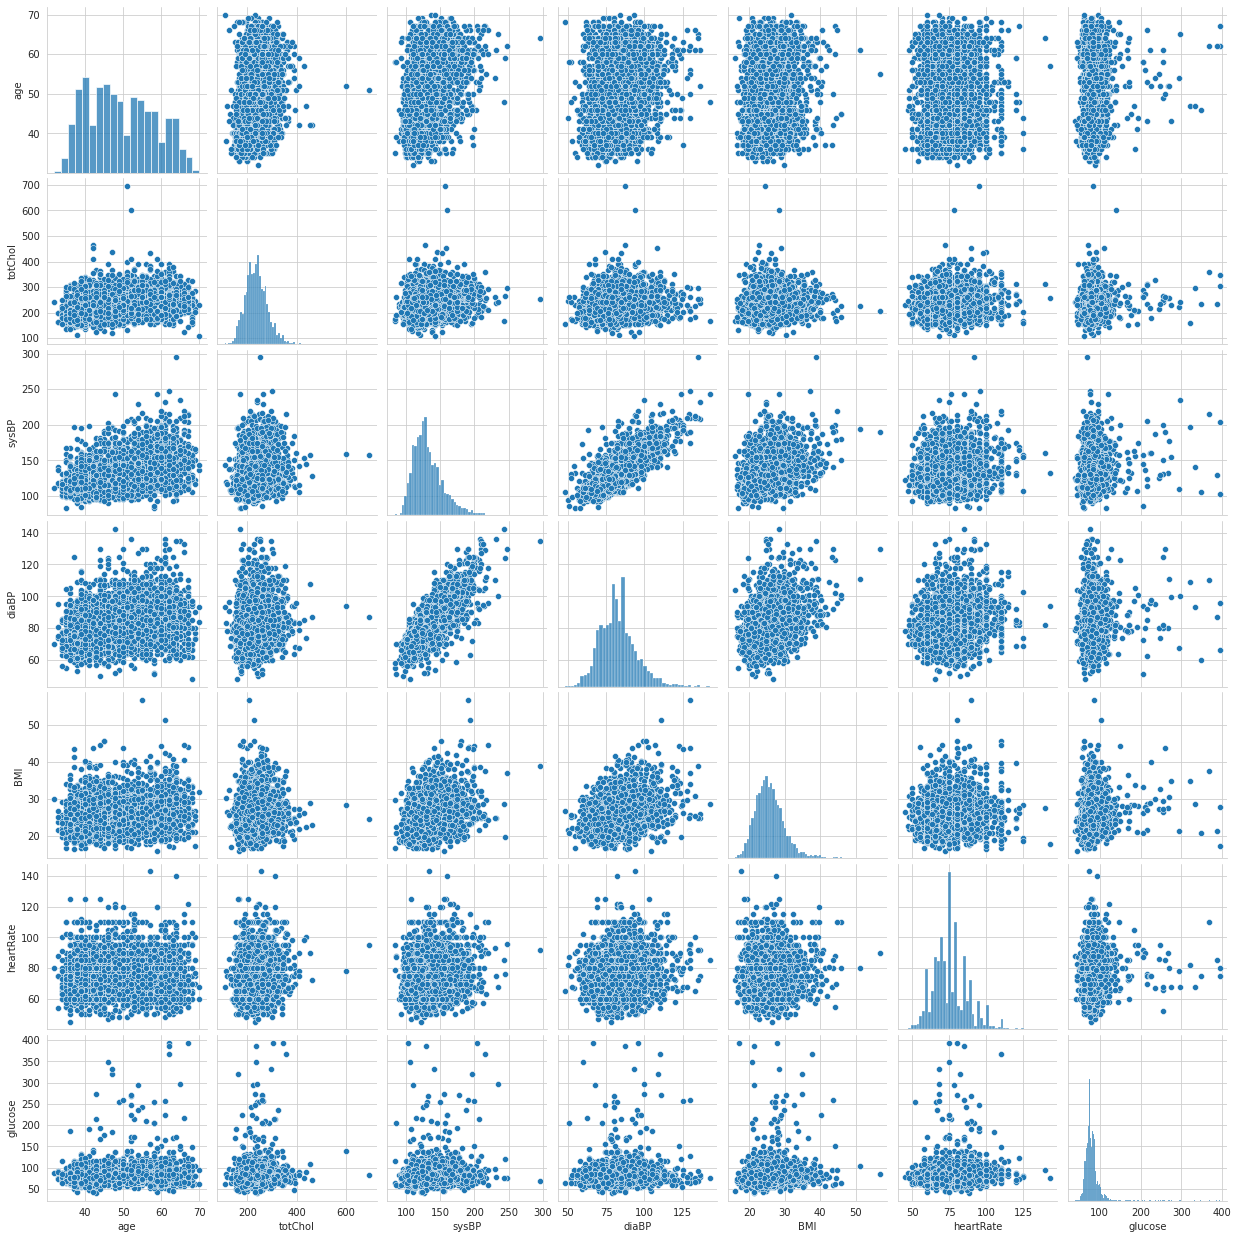

In [73]:
# Bivariate analysis using pairplot
sns.pairplot(df[numerical_columns])

#### from the above visualizaion we can say that 
####As cholestrol is low the systolic BP also remains low.
####Systolic BP and diastolic BP have a positive relationship.
####Most of the cases, less cholesterol means less glucose.
####Diastolic BP, systolic BP and BMI have a slight positive relationship.

#Handling missing values

##Education

In [74]:
#Education null values
df['education'].fillna(df['education'].mode().iloc[0],inplace=True)

###BPMeds

In [75]:
df['BPMeds'].value_counts()

0.0    3246
1.0     100
Name: BPMeds, dtype: int64

In [76]:
#handling  null values od BPMeds
df['BPMeds'] = df['BPMeds'].fillna(df['BPMeds'].mode().iloc[0])

###cigsPerDay

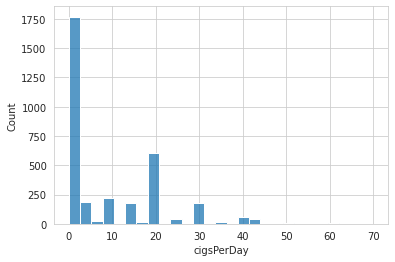

In [77]:
sns.histplot(df['cigsPerDay'])

In [78]:
df['cigsPerDay'].nunique()

32

In [79]:
df['cigsPerDay'] = df['cigsPerDay'].fillna(df['cigsPerDay'].mode().iloc[0])

In [80]:
df['cigsPerDay'].isna().sum()

0

#####Here, we handled the cigsPerDay variable like a categorical variable, its because there are very few unique values present in this column. later we will covert this column fully in categorical column.

##Handling missinh values of numerical variables

totChol  Null values are : 1.1209 %
BMI  Null values are : 0.413 %
heartRate  Null values are : 0.0295 %
glucose  Null values are : 8.9676 %


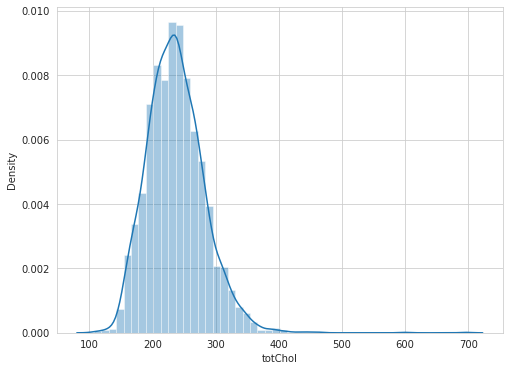

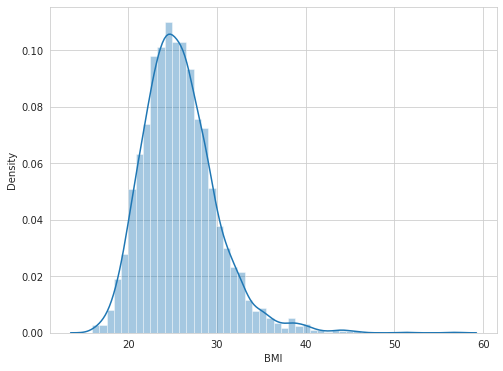

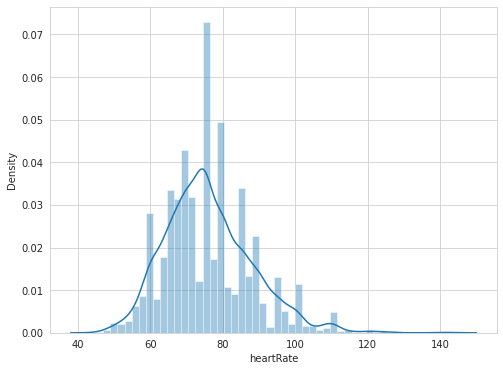

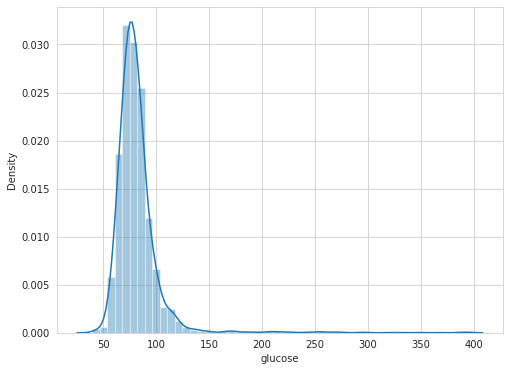

In [81]:
numeric_null=[]
for i in numerical_columns:
  if df[i].isna().sum()>0:
    numeric_null.append(i)
for i in numeric_null:
  plt.figure(figsize=(8,6))
  print(i,' Null values are :',round(df[i].isna().sum()/len(df)*100,4),"%")
  sns.distplot(df[i])

#### we are going to fill variables withmissing values of less then 5% with mean and more then 5% with KNN imputer

In [82]:
def fill_numeric_values_with_mean(df,col):
  df[col] = df[col].fillna(df[col].mean())

In [83]:
df.isna().sum()

id                   0
age                  0
education            0
sex                  0
is_smoking           0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [84]:
# filling null values with mean of  variables with null values less then 5%.
for i in numeric_null:
  if i != 'glucose':
    fill_numeric_values_with_mean(df,i)

In [85]:
df.isna().sum()

id                   0
age                  0
education            0
sex                  0
is_smoking           0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            0
glucose            304
TenYearCHD           0
dtype: int64

In [86]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()

df['glucose'] = imputer.fit_transform(df['glucose'].values.reshape(-1,1))

In [87]:
df.isna().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

#### all the missing values of numerical variables are imputed

In [88]:
df1 = df.copy()

#Handling Outliers

In [89]:
df.drop('id',axis=1,inplace=True)

In [90]:
df[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
age,3390.0,49.542183,8.592878,32.00,42.00,49.0,56.0000,70.0
totChol,3390.0,237.074284,44.993041,107.00,206.00,235.0,264.0000,696.0
sysBP,3390.0,132.601180,22.292030,83.50,117.00,128.5,144.0000,295.0
diaBP,3390.0,82.883038,12.023581,48.00,74.50,82.0,90.0000,142.5
BMI,3390.0,25.794964,4.106939,15.96,23.03,25.4,27.9975,56.8
heartRate,3390.0,75.977279,11.970102,45.00,68.00,75.0,83.0000,143.0
glucose,3390.0,82.086520,23.131808,40.00,72.00,80.0,85.0000,394.0


In [91]:
# using Z- score to handle outliers
def remove_outlier(df,column):
  
  plt.figure(figsize=(15,6))
  plt.subplot(1, 2, 1)
  plt.title('Before Handling outliers')
  sns.boxplot(df[column])
  plt.subplot(1, 2, 2)
  sns.distplot(df[column])
  df = df[((df[column] - df[column].mean()) / df[column].std()).abs() < 3]
  df = df[((df[column] - df[column].mean()) / df[column].std()).abs() > -3]
  
  plt.figure(figsize=(15,6))
  
  plt.subplot(1, 2, 1)
  plt.title('After Handling outliers')
  sns.boxplot(df[column])
  plt.subplot(1, 2, 2)
  sns.distplot(df[column])

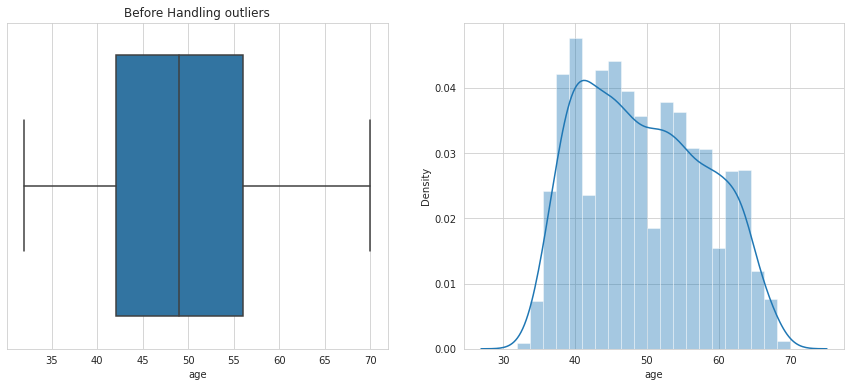

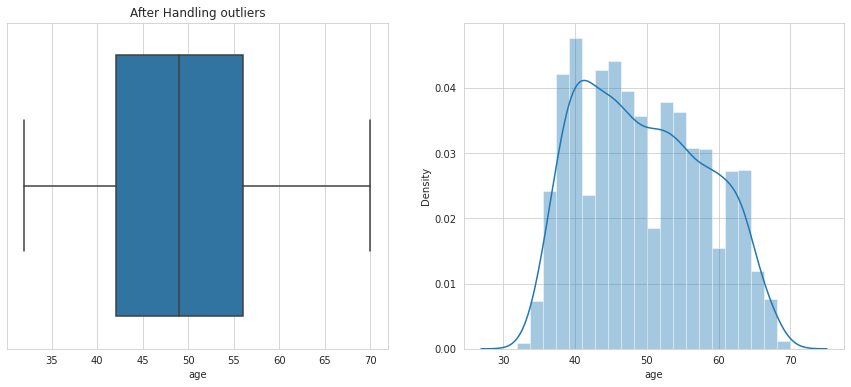

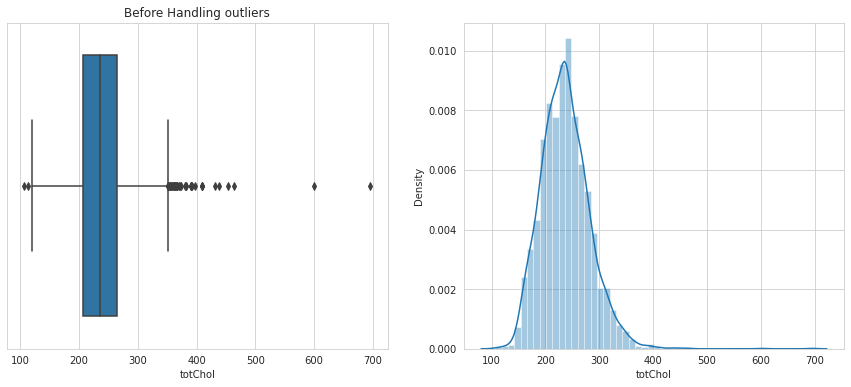

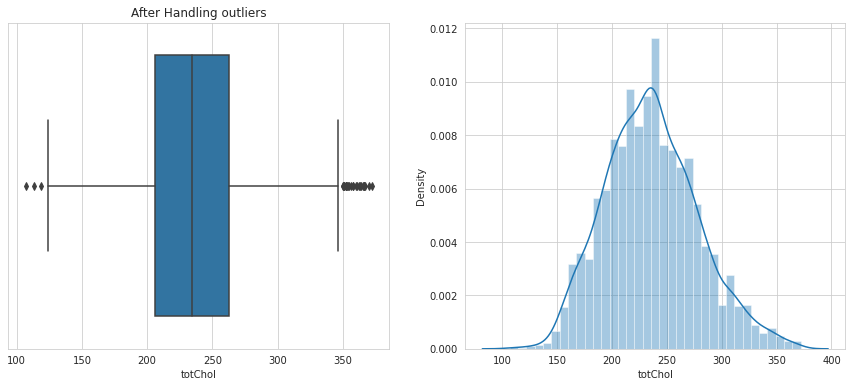

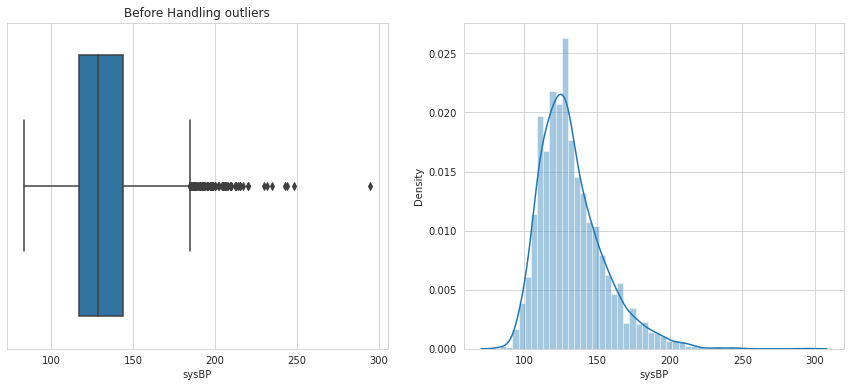

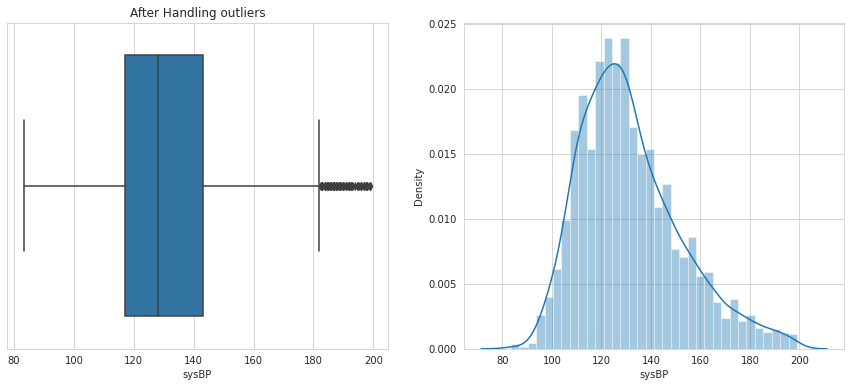

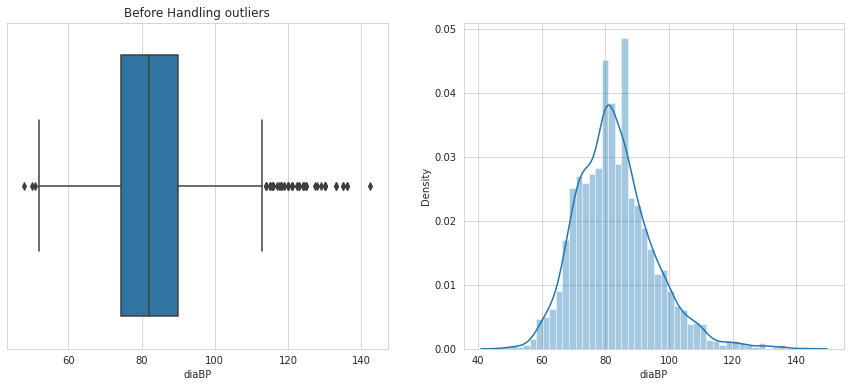

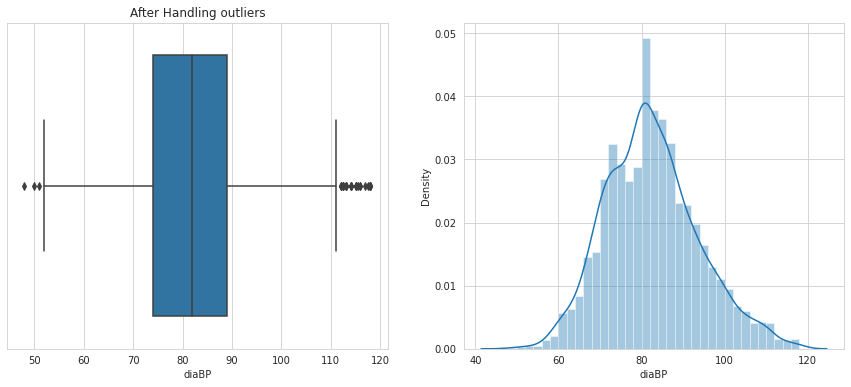

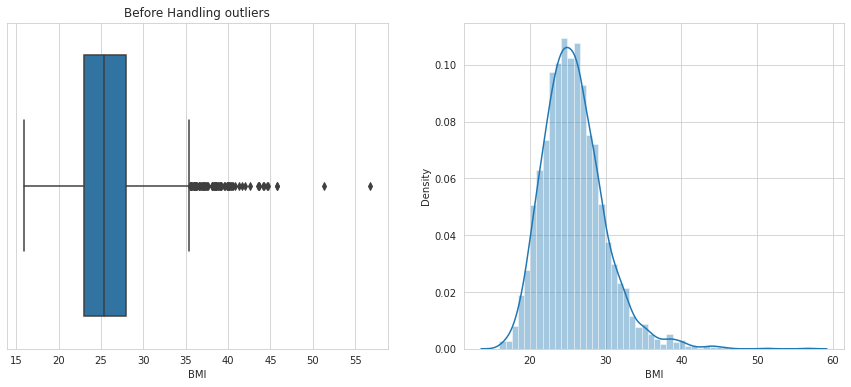

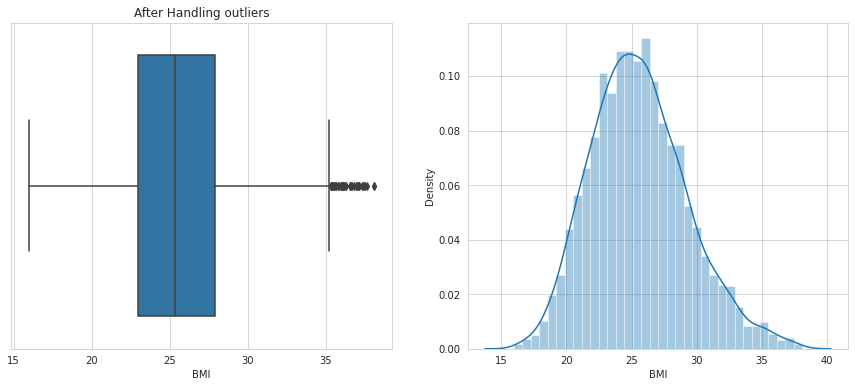

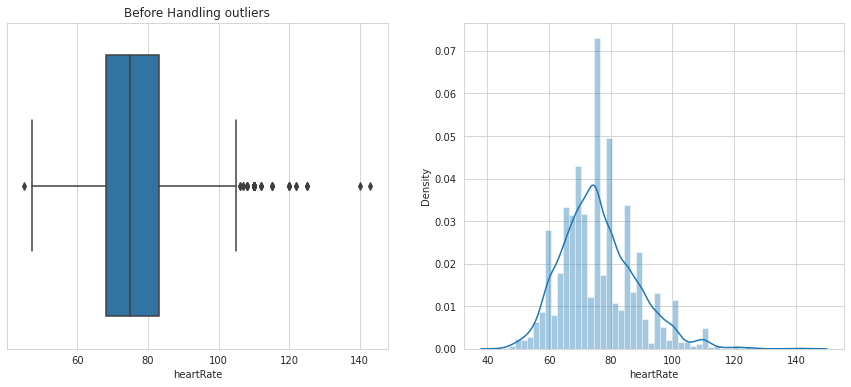

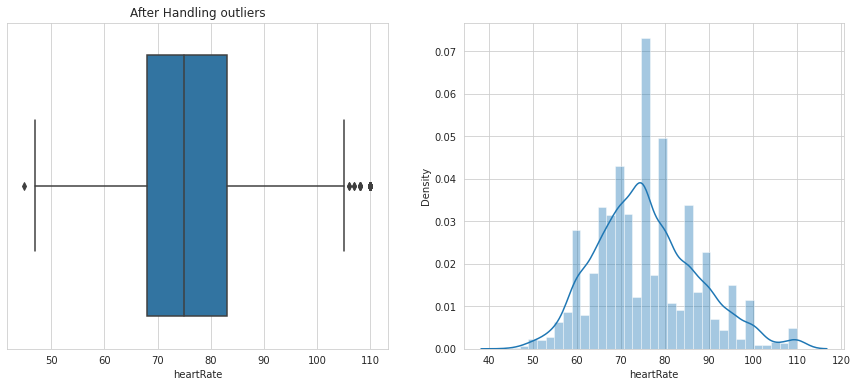

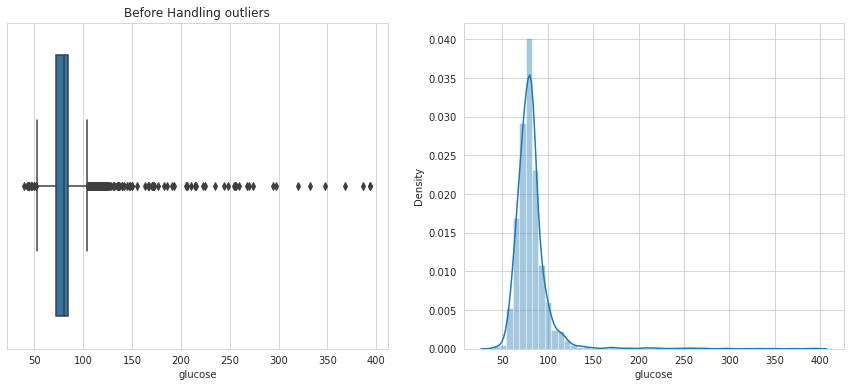

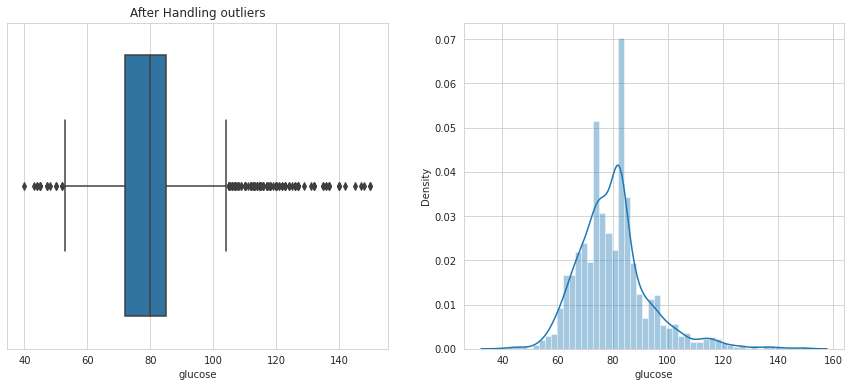

In [92]:
for col in numerical_columns:
  remove_outlier(df,col)

#Feature Engineering

In [93]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0,0


##CigsPerDay

#### we are going to convert CigsPerDay into categorical variable according to the values of consuption

In [94]:
# convertings CigsPerDay column into categorical variable
for i in range(len(df)):
  if df['cigsPerDay'][i] == 0:
    df['cigsPerDay'][i] = 'No'
  elif df['cigsPerDay'][i] > 0 and df['cigsPerDay'][i] < 20:
    df['cigsPerDay'][i] = 'Average'
  else:
    df['cigsPerDay'][i] = 'High'

In [95]:
df['cigsPerDay'].value_counts()

No         1725
High        970
Average     695
Name: cigsPerDay, dtype: int64

##sysBP and diaBP

####Whenever we analyse the BP, we consider sysBP and diaBP together to ge the better result. So here also, we consider these vaues together and create a new categorical column.

In [96]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,F,YES,Average,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,1
1,36,4.0,M,NO,No,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,0
2,46,1.0,F,YES,Average,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0
3,50,1.0,M,YES,High,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0,1
4,64,1.0,F,YES,High,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0,0


In [97]:
# combining sysBP and diaBP into single column BP
df['BP'] = 0

df.loc[(df['sysBP'] < 120) & (df['diaBP'] < 80), 'BP'] = 1

df.loc[((df['sysBP'] >= 120) & (df['sysBP'] < 130)) &
         ((df['diaBP'] < 80)), 'BP'] = 2

df.loc[((df['sysBP'] >= 130) & (df['sysBP'] < 140)) |
         ((df['diaBP'] >= 80) & (df['diaBP'] < 90)), 'BP'] = 3

df.loc[((df['sysBP'] >= 140) & (df['sysBP'] < 180)) |
         ((df['diaBP'] >= 90) & (df['diaBP'] < 120)), 'BP'] = 4

df.loc[(df['sysBP'] >= 180) | (df['diaBP'] >= 120), 'BP'] = 5


In [98]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,BP
0,64,2.0,F,YES,Average,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,1,4
1,36,4.0,M,NO,No,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,0,4
2,46,1.0,F,YES,Average,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0,1
3,50,1.0,M,YES,High,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0,1,4
4,64,1.0,F,YES,High,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0,0,3


In [99]:
df.drop(['sysBP','diaBP'],axis=1,inplace=True)

In [100]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD,BP
0,64,2.0,F,YES,Average,0.0,0,0,0,221.0,25.794964,90.0,80.0,1,4
1,36,4.0,M,NO,No,0.0,0,1,0,212.0,29.770000,72.0,75.0,0,4
2,46,1.0,F,YES,Average,0.0,0,0,0,250.0,20.350000,88.0,94.0,0,1
3,50,1.0,M,YES,High,0.0,0,1,0,233.0,28.260000,68.0,94.0,1,4
4,64,1.0,F,YES,High,0.0,0,0,0,241.0,26.420000,70.0,77.0,0,3


In [101]:
df2 = df.copy()

#Multicollinearity

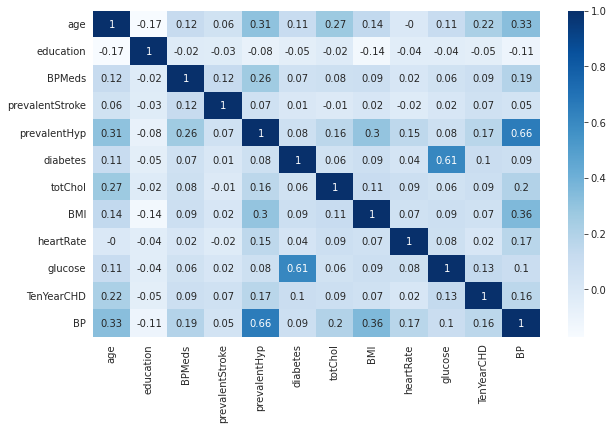

In [102]:
plt.figure(figsize=(10,6))
sns.heatmap(round(df.corr(),2),annot=True,cmap='Blues');

#### droping column prevalentHyp because it is highly correlated with Bp and droping column diabetes too because it is highly correlated with glucose

In [103]:
# droping highly correlated columns
df.drop('prevalentHyp',axis=1,inplace=True)
df.drop('diabetes',axis=1,inplace=True)

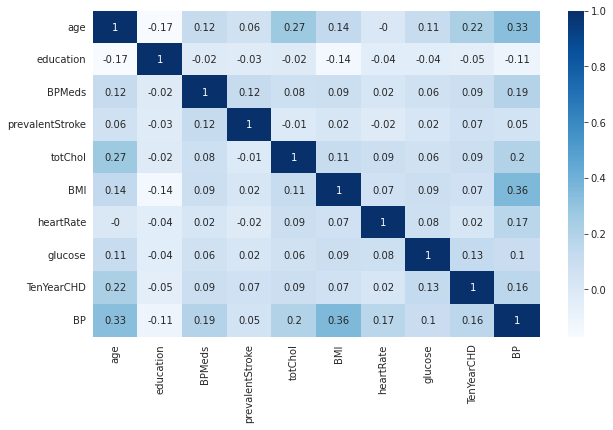

In [104]:
plt.figure(figsize=(10,6))
sns.heatmap(round(df.corr(),2),annot=True,cmap='Blues');

## all the highly correlated columns are removed

In [105]:
df3 = df.copy()

#Transformation

In [106]:
import scipy.stats as stats
import pylab

def to_plot(df,column):
  plt.figure(figsize=(10,6))
  plt.subplot(1,2,1)
  sns.distplot(df[column])
  plt.subplot(1,2,2)
  stats.probplot(df[column],dist='norm',plot=pylab)
  plt.show()

def log_transform(df,column):
  print("Before Transformation")
  to_plot(df,column)
  # applying log transformation
  df[column]=np.log1p(df[column])
  #plotting
  print("After Transformation")
  to_plot(df,column)
  # stats.probplot()

def box_cox_transform(df,column):
  print("Before Transformation")
  to_plot(df,column)
  # applying boxcox transformation
  df[column],parameters=stats.boxcox(df[column])
  print("After Transformation")
  to_plot(df,column)

In [107]:
numerical_columns

['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

In [108]:
numerical_columns = ['age', 'totChol', 'BMI', 'heartRate', 'glucose']

In [109]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,totChol,BMI,heartRate,glucose,TenYearCHD,BP
0,64,2.0,F,YES,Average,0.0,0,221.0,25.794964,90.0,80.0,1,4
1,36,4.0,M,NO,No,0.0,0,212.0,29.770000,72.0,75.0,0,4
2,46,1.0,F,YES,Average,0.0,0,250.0,20.350000,88.0,94.0,0,1
3,50,1.0,M,YES,High,0.0,0,233.0,28.260000,68.0,94.0,1,4
4,64,1.0,F,YES,High,0.0,0,241.0,26.420000,70.0,77.0,0,3


Before Transformation


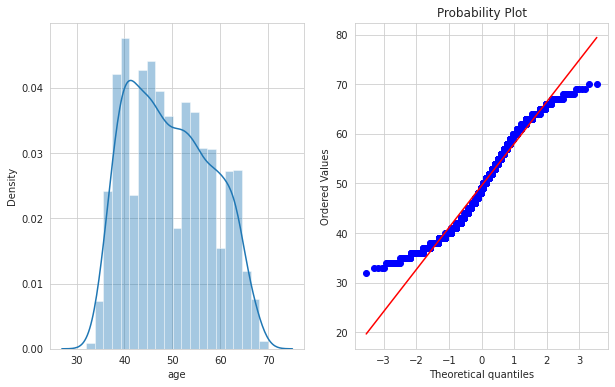

After Transformation


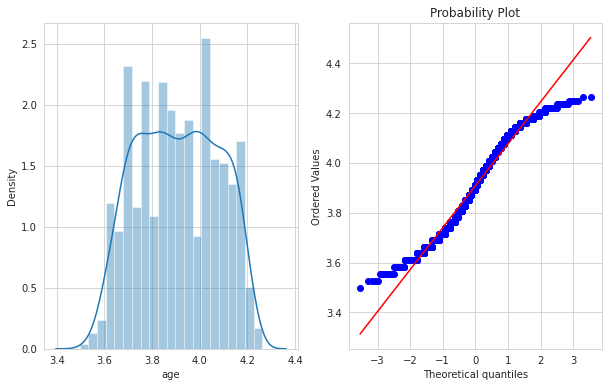

Before Transformation


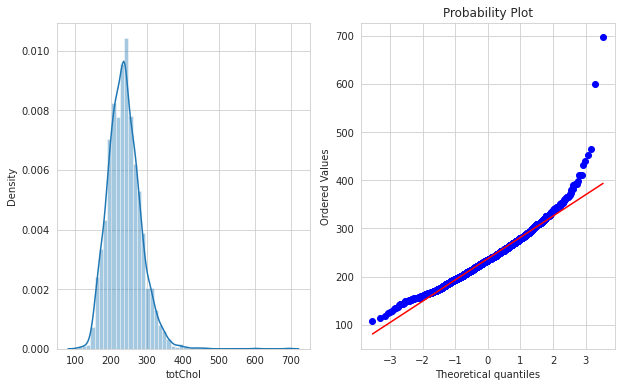

After Transformation


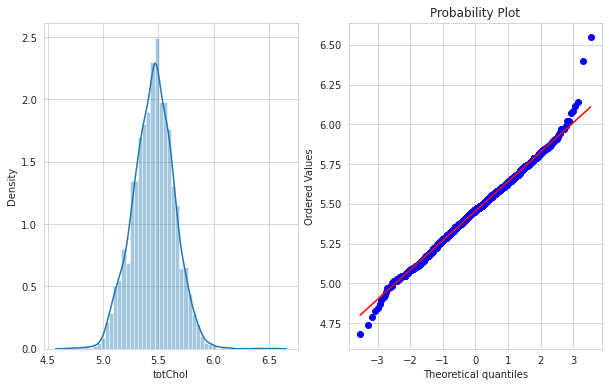

Before Transformation


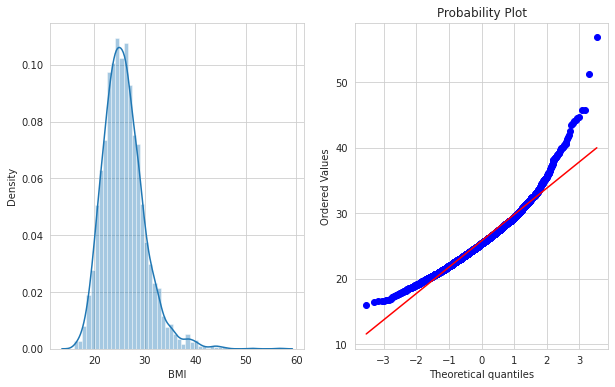

After Transformation


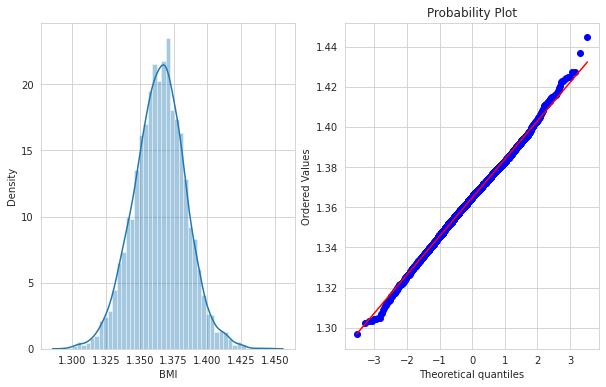

Before Transformation


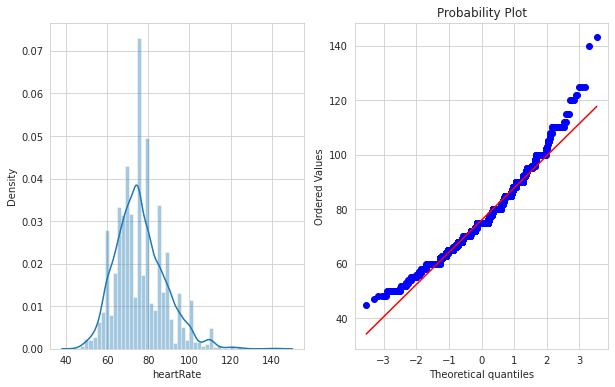

After Transformation


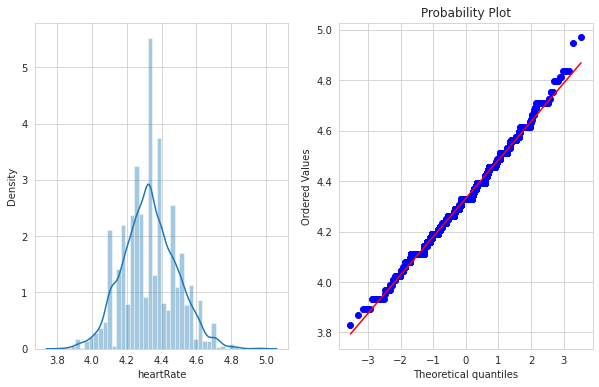

Before Transformation


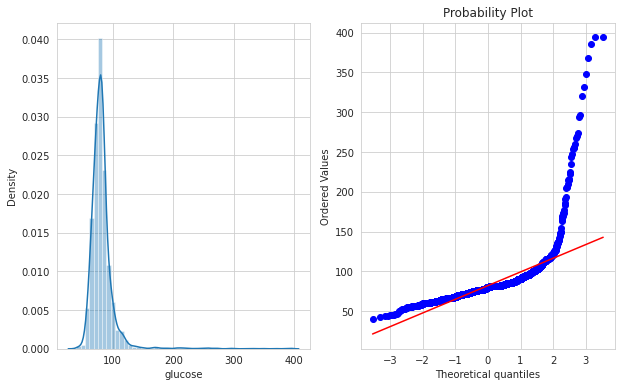

After Transformation


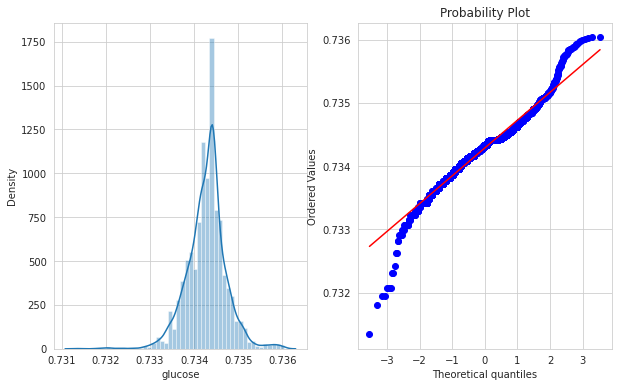

In [110]:
#Applying the transformaation to only numerical columns
log_transform(df,'age')
log_transform(df,'totChol')
box_cox_transform(df,'BMI')
log_transform(df,'heartRate')
box_cox_transform(df,'glucose')

In [111]:
df4 = df.copy()

#### transformation is not necessary in classification but still we are doing it, it may improve tghe performance of algo

#One hot encoding

In [112]:
categorical_columns = ['education','cigsPerDay', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke','TenYearCHD','BP']

In [113]:
# including only independent variable
df_cat = df[categorical_columns]

# performing one hot encoding.
df_cat.drop('TenYearCHD',axis=1,inplace=True)
df_cat = pd.get_dummies(df_cat, columns=df_cat.columns)
df_cat.head()

,education_1.0,education_2.0,education_3.0,education_4.0,cigsPerDay_Average,cigsPerDay_High,cigsPerDay_No,sex_F,sex_M,is_smoking_NO,is_smoking_YES,BPMeds_0.0,BPMeds_1.0,prevalentStroke_0,prevalentStroke_1,BP_1,BP_2,BP_3,BP_4,BP_5
0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,1,1,0,1,0,1,0,0,0,0,1,0
2,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,0,0
3,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0,0,0,0,1,0
4,1,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0


#MinMaxScaler

In [114]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,totChol,BMI,heartRate,glucose,TenYearCHD,BP
0,4.174387,2.0,F,YES,Average,0.0,0,5.402677,1.367133,4.510860,0.734340,1,4
1,3.610918,4.0,M,NO,No,0.0,0,5.361292,1.384233,4.290459,0.734164,0,4
2,3.850148,1.0,F,YES,Average,0.0,0,5.525453,1.335163,4.488636,0.734716,0,1
3,3.931826,1.0,M,YES,High,0.0,0,5.455321,1.378203,4.234107,0.734716,1,4
4,4.174387,1.0,F,YES,High,0.0,0,5.488938,1.370100,4.262680,0.734238,0,3


In [115]:
# concatinating ctegorical and numerical variables
df_new = df[numerical_columns].copy()
for i in df_cat.columns:
  df_new[i] = df_cat[i]

In [116]:
df_new.head()

,age,totChol,BMI,heartRate,glucose,education_1.0,education_2.0,education_3.0,education_4.0,cigsPerDay_Average,...,is_smoking_YES,BPMeds_0.0,BPMeds_1.0,prevalentStroke_0,prevalentStroke_1,BP_1,BP_2,BP_3,BP_4,BP_5
0,4.174387,5.402677,1.367133,4.510860,0.734340,0,1,0,0,1,...,1,1,0,1,0,0,0,0,1,0
1,3.610918,5.361292,1.384233,4.290459,0.734164,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
2,3.850148,5.525453,1.335163,4.488636,0.734716,1,0,0,0,1,...,1,1,0,1,0,1,0,0,0,0
3,3.931826,5.455321,1.378203,4.234107,0.734716,1,0,0,0,0,...,1,1,0,1,0,0,0,0,1,0
4,4.174387,5.488938,1.370100,4.262680,0.734238,1,0,0,0,0,...,1,1,0,1,0,0,0,1,0,0


In [117]:
# listing column names
column_names = list(df_new.columns)



# creating a empty dataframe
df_scaled = pd.DataFrame()


# scaling data using minmaxscaleer

scaler = MinMaxScaler()
scaled = scaler.fit_transform(df_new[df_new.columns])

df_scaled = pd.DataFrame(scaler.fit_transform(df_new[df_new.columns]))
df_scaled.columns = column_names

In [118]:
df_scaled.head()

,age,totChol,BMI,heartRate,glucose,education_1.0,education_2.0,education_3.0,education_4.0,cigsPerDay_Average,...,is_smoking_YES,BPMeds_0.0,BPMeds_1.0,prevalentStroke_0,prevalentStroke_1,BP_1,BP_2,BP_3,BP_4,BP_5
0,0.884761,0.386423,0.475615,0.597822,0.638504,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.149327,0.364229,0.591501,0.404688,0.601095,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.461567,0.452267,0.258949,0.578348,0.718827,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.568173,0.414656,0.550636,0.355306,0.718827,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.884761,0.432684,0.495721,0.380345,0.616747,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [119]:
df_after_scaling = df_scaled.copy()

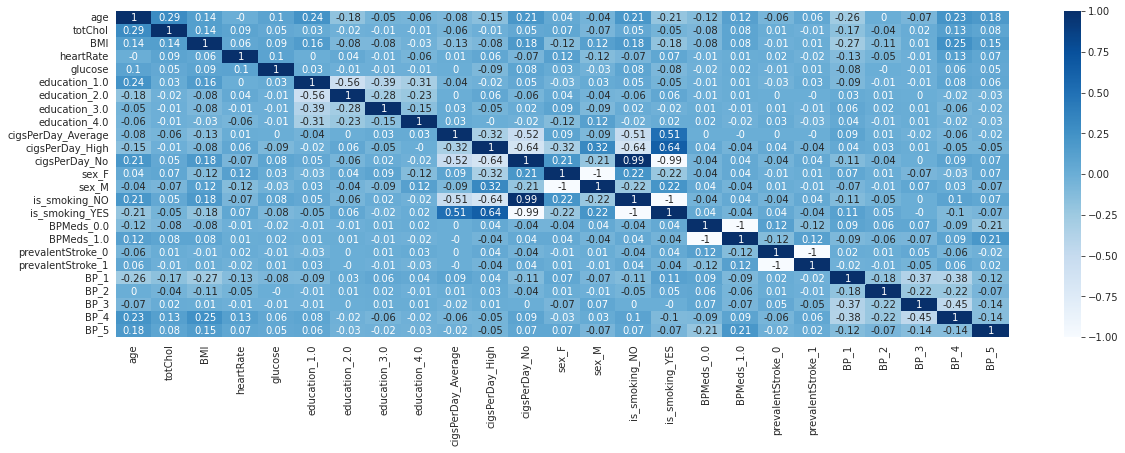

In [120]:
plt.figure(figsize=(20,6))
sns.heatmap(round(df_scaled.corr(),2),annot=True,cmap='Blues');

In [121]:
#We can drop is_smoking column as its highly correlated to consumption of cigarate
df_scaled.drop('is_smoking_YES',axis=1,inplace=True)
df_scaled.drop('is_smoking_NO',axis=1,inplace=True)

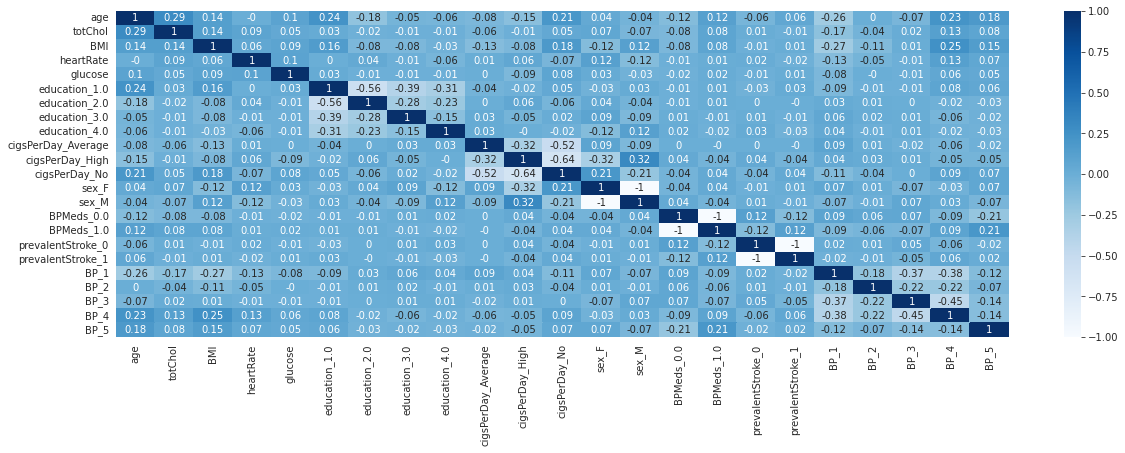

In [122]:
plt.figure(figsize=(20,6))
sns.heatmap(round(df_scaled.corr(),2),annot=True,cmap='Blues');

In [123]:
# deleting correlated columns
df_scaled.drop('sex_F',axis=1,inplace=True)
df_scaled.drop('BPMeds_0.0',axis=1,inplace=True)
df_scaled.drop('prevalentStroke_0',axis=1,inplace=True)
df_scaled.drop('cigsPerDay_No',axis=1,inplace=True)

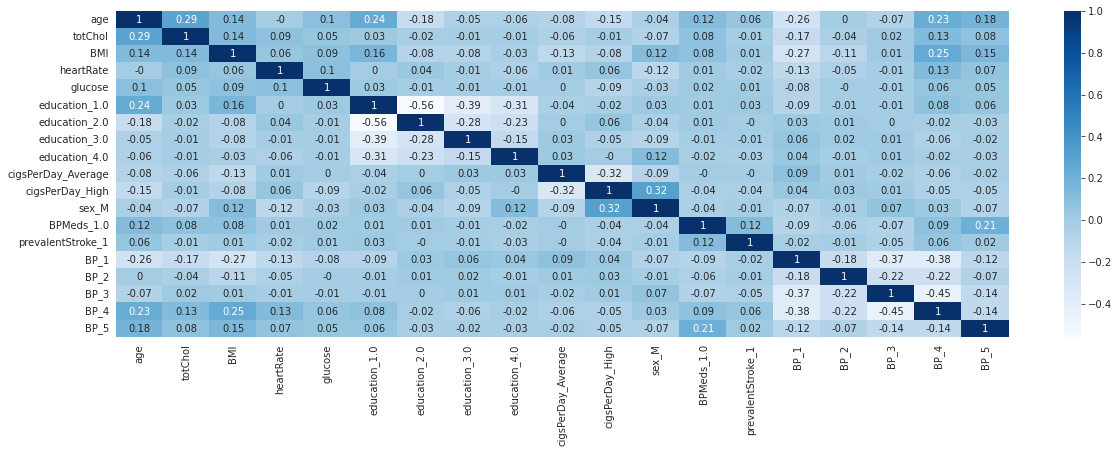

In [124]:
plt.figure(figsize=(20,6))
sns.heatmap(round(df_scaled.corr(),2),annot=True,cmap='Blues');

#### our data is cleaned and now we are going to select features and after that we will build models

In [125]:
df_scaled.head()

,age,totChol,BMI,heartRate,glucose,education_1.0,education_2.0,education_3.0,education_4.0,cigsPerDay_Average,cigsPerDay_High,sex_M,BPMeds_1.0,prevalentStroke_1,BP_1,BP_2,BP_3,BP_4,BP_5
0,0.884761,0.386423,0.475615,0.597822,0.638504,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.149327,0.364229,0.591501,0.404688,0.601095,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.461567,0.452267,0.258949,0.578348,0.718827,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.568173,0.414656,0.550636,0.355306,0.718827,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.884761,0.432684,0.495721,0.380345,0.616747,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [126]:
# copying the cleaned data
df_cleaned = df_scaled.copy()

#Feature selection

In [127]:
#importing the libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression